In [2]:
import eli5
from eli5.sklearn import PermutationImportance
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report, roc_curve, roc_auc_score
from xgboost import XGBClassifier

#Uses Jupyter's own backend to plot
%matplotlib inline

In [3]:
#Show all rows and columns
pd.set_option("max_rows", None)
pd.set_option("max_columns", None)

# Introduction

Mental health is an important issue to be addressed solely by the fact that it isn't physically visable, thus we can't always offer help or symphatize. Moreover, the lack of open discussions about these issues are equevalent to the amount of support that comes from people in leadership roles in a company. Utlimately, key figures in a company have the power to change this perception.

# Goal

The goal is to predict whether if an employee wil seek treatment or not. Specifically, what conditions (features) promote to a positive outcome (seek treatment).

**Show all rows**

# 1. Data overview

In [4]:
#Read original CSV, make a copy of it
surveyO = pd.read_csv("Dataset/Mental_Health_in_Tech_2020_OSMI.csv")
surveyC1 = surveyO.copy() #Make changes here instead of the original df

In [40]:
surveyC1.head()

,num_employees,is_comp_role_in_tech,employer_mh_coverage,employer_options_in_mh_coverage,employer_mh_disc,employer_offer_mh_res,employer_mh_sa_anonimity,employer_mh_leave_difficulty,coworker_comfort_reveal_ph_mh_disc,supervisor_comfort_mh_disc,employer_reveal_mh_disc,coworker_comfort_mh_disc,coworker_reveal_mh_disc,coworker_confine_mh_disc,employer_ph_importance,employer_mh_importance,prev_employer,prev_employer_is_tech_company,prev_employer_mh_coverage,prev_employer_options_in_mh_coverage,prev_employer_mh_disc,prev_employer_offer_mh_res,prev_employer_mh_sa_anonimity,prev_employer_comfort_reveal_ph_mh_disc,prev_supervisor_comfort_mh_disc,prev_employer_reveal_mh_disc,prev_coworker_comfort_mh_disc,prev_coworker_mh_desc,prev_coworker_confine_mh_disc,prev_employer_ph_importance,prev_employer_mh_importance,currently_have_mh,diagnosed_mh,"Anxiety Disorder (Generalized, Social, Phobia, etc).1","Mood Disorder (Depression, Bipolar Disorder, etc).1","Psychotic Disorder (Schizophrenia, Schizoaffective, etc).1","Eating Disorder (Anorexia, Bulimia, etc).1",Attention Deficit Hyperactivity Disorder.1,"Personality Disorder (Borderline, Antisocial, Paranoid, etc).1",Obsessive-Compulsive Disorder.1,Post-traumatic Stress Disorder.1,Stress Response Syndromes.1,Dissociative Disorder.1,Substance Use Disorder.1,Addictive Disorder.1,Other.1,"Anxiety Disorder (Generalized, Social, Phobia, etc).2","Mood Disorder (Depression, Bipolar Disorder, etc).2","Psychotic Disorder (Schizophrenia, Schizoaffective, etc).2","Eating Disorder (Anorexia, Bulimia, etc).2",Attention Deficit Hyperactivity Disorder.2,"Personality Disorder (Borderline, Antisocial, Paranoid, etc).2",Obsessive-Compulsive Disorder.2,Post-traumatic Stress Disorder.2,Stress Response Syndromes.2,Dissociative Disorder.2,Substance Use Disorder.2,Addictive Disorder.2,Other.2,past_mh,sought_mh_treatment,mh_family_history,mh_with_treatment_impact_on_work,mh_with_no_treatment_impact_on_work,others_mh_reveal_impact_on_mh_self_reveal,friends_fam_mh_reveal,future_employer_ph_reveal,future_employer_mh_reveal,identified_mh_at_work,identified_mh_at_work_has_effected,identified_mh_at_work_how_effected,if_coworker_knew_of_my_mh_results,mh_bad_response_at_work,mh_positive_response_at_work_desc,tech_industry_mh_support,survey_creators_comfort_reveal,age,gender,race,country_work
1,1001,1.0,2,0,2,2,1,5,2,2,0.0,1,0.0,0.0,4.0,4.0,1,1.0,1,-1,0,1,0,1,0,0.0,1,1.0,0.0,1.0,0.0,1,-1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,2,2,1,3,2,0,0,-1.0,-1.0,3,2,2,4,1,26,1,White,United States of America
2,501,1.0,0,0,1,2,1,4,1,1,0.0,2,1.0,0.0,8.0,8.0,1,1.0,0,-1,0,0,1,1,0,0.0,0,0.0,0.0,5.0,5.0,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,7,0,0,0,-1.0,-1.0,6,0,1,3,0,32,1,I prefer not to answer,India
3,6,1.0,1,0,0,0,1,5,2,0,0.0,0,1.0,1.0,4.0,2.0,1,0.0,1,1,2,1,0,0,0,0.0,0,0.0,0.0,0.0,0.0,1,-1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,0,0,0,0,-1.0,-1.0,0,1,0,3,1,34,1,More than one of the above,United States of America
4,26,1.0,2,1,1,1,1,4,2,2,1.0,1,1.0,1.0,8.0,8.0,1,0.0,1,1,1,1,1,1,1,1.0,1,1.0,1.0,10.0,9.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0,2,1,2,2,3,0,9,1,0,0,-1.0,-1.0,7,0,2,4,1,44,2,White,United States of America
5,501,1.0,0,0,0,2,2,1,2,0,0.0,0,0.0,0.0,8.0,6.0,1,1.0,0,-1,0,0,0,1,1,0.0,1,-1.0,-1.0,8.0,6.0,1,-1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,3,2,7,1,0,0,-1.0,-1.0,3,0,3,3,0,33,1,I prefer not to answer,India


In [41]:
surveyC1.tail()

,num_employees,is_comp_role_in_tech,employer_mh_coverage,employer_options_in_mh_coverage,employer_mh_disc,employer_offer_mh_res,employer_mh_sa_anonimity,employer_mh_leave_difficulty,coworker_comfort_reveal_ph_mh_disc,supervisor_comfort_mh_disc,employer_reveal_mh_disc,coworker_comfort_mh_disc,coworker_reveal_mh_disc,coworker_confine_mh_disc,employer_ph_importance,employer_mh_importance,prev_employer,prev_employer_is_tech_company,prev_employer_mh_coverage,prev_employer_options_in_mh_coverage,prev_employer_mh_disc,prev_employer_offer_mh_res,prev_employer_mh_sa_anonimity,prev_employer_comfort_reveal_ph_mh_disc,prev_supervisor_comfort_mh_disc,prev_employer_reveal_mh_disc,prev_coworker_comfort_mh_disc,prev_coworker_mh_desc,prev_coworker_confine_mh_disc,prev_employer_ph_importance,prev_employer_mh_importance,currently_have_mh,diagnosed_mh,"Anxiety Disorder (Generalized, Social, Phobia, etc).1","Mood Disorder (Depression, Bipolar Disorder, etc).1","Psychotic Disorder (Schizophrenia, Schizoaffective, etc).1","Eating Disorder (Anorexia, Bulimia, etc).1",Attention Deficit Hyperactivity Disorder.1,"Personality Disorder (Borderline, Antisocial, Paranoid, etc).1",Obsessive-Compulsive Disorder.1,Post-traumatic Stress Disorder.1,Stress Response Syndromes.1,Dissociative Disorder.1,Substance Use Disorder.1,Addictive Disorder.1,Other.1,"Anxiety Disorder (Generalized, Social, Phobia, etc).2","Mood Disorder (Depression, Bipolar Disorder, etc).2","Psychotic Disorder (Schizophrenia, Schizoaffective, etc).2","Eating Disorder (Anorexia, Bulimia, etc).2",Attention Deficit Hyperactivity Disorder.2,"Personality Disorder (Borderline, Antisocial, Paranoid, etc).2",Obsessive-Compulsive Disorder.2,Post-traumatic Stress Disorder.2,Stress Response Syndromes.2,Dissociative Disorder.2,Substance Use Disorder.2,Addictive Disorder.2,Other.2,past_mh,sought_mh_treatment,mh_family_history,mh_with_treatment_impact_on_work,mh_with_no_treatment_impact_on_work,others_mh_reveal_impact_on_mh_self_reveal,friends_fam_mh_reveal,future_employer_ph_reveal,future_employer_mh_reveal,identified_mh_at_work,identified_mh_at_work_has_effected,identified_mh_at_work_how_effected,if_coworker_knew_of_my_mh_results,mh_bad_response_at_work,mh_positive_response_at_work_desc,tech_industry_mh_support,survey_creators_comfort_reveal,age,gender,race,country_work
151,1001,1.0,0,0,0,0,0,2,2,0,0.0,0,0.0,0.0,2.0,2.0,0,-1.0,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,-1.0,-1.0,-1.0,-1.0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,0,9,0,0,0,-1.0,-1.0,1,0,0,2,1,53,1,Asian,United States of America
152,26,1.0,2,1,2,2,1,5,2,1,0.0,1,1.0,0.0,9.0,7.0,1,1.0,0,-1,0,0,1,1,1,0.0,0,1.0,1.0,10.0,6.0,1,-1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,3,-1,4,1,1,0,-1.0,-1.0,8,3,0,3,0,23,2,I prefer not to answer,Philippines
153,101,1.0,1,0,0,1,1,4,2,1,0.0,1,1.0,1.0,5.0,5.0,1,0.0,1,-1,1,1,1,1,2,0.0,1,1.0,1.0,7.0,5.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,3,-1,7,1,0,0,-1.0,-1.0,5,0,0,3,0,34,1,White,United States of America
154,501,1.0,2,0,2,2,2,1,2,0,0.0,1,0.0,1.0,6.0,5.0,1,0.0,1,1,1,1,1,1,0,0.0,0,0.0,0.0,5.0,5.0,1,-1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,1,2,1,5,0,0,0,-1.0,-1.0,2,2,0,3,0,43,1,I prefer not to answer,Canada
155,501,1.0,-1,-1,2,0,1,5,0,2,1.0,2,1.0,1.0,8.0,8.0,1,1.0,0,-1,0,0,1,1,0,0.0,1,1.0,0.0,3.0,3.0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,0,8,2,2,0,-1.0,-1.0,8,2,0,4,0,37,1,I prefer not to answer,Netherlands


In [7]:
print("Number of rows: {}, Number of columns: {}".format(surveyC1.shape[0], surveyC1.shape[1]))

Number of rows: 180, Number of columns: 120


#### Check for any duplicated rows

In [8]:
surveyC1.duplicated().value_counts()

False    180
dtype: int64

#### Check for any NaN values

In [9]:
#Show features with more than 0 NaN
null_vals = surveyC1.isnull().sum().sort_values().to_frame() #Returns a series, thus we need to make a df
null_vals = null_vals.loc[null_vals[0] != 0] #Find only the columns that have a null
null_vals

,0
What is your gender?,2
Have you had a mental health disorder in the past?,4
"Overall, how much importance does your employer place on mental health?",25
"Overall, how much importance does your employer place on physical health?",25
Have you ever discussed your mental health with coworkers?,25
"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",25
Does your employer provide mental health benefits as part of healthcare coverage?,25
Is your primary role within your company related to tech/IT?,25
How many employees does your company or organization have?,25
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,25


In [10]:
print("Number of Columns that have more than 1 NaN is: {}".format(null_vals.shape[0]))

Number of Columns that have more than 1 NaN is: 100


#### Missing values visualization

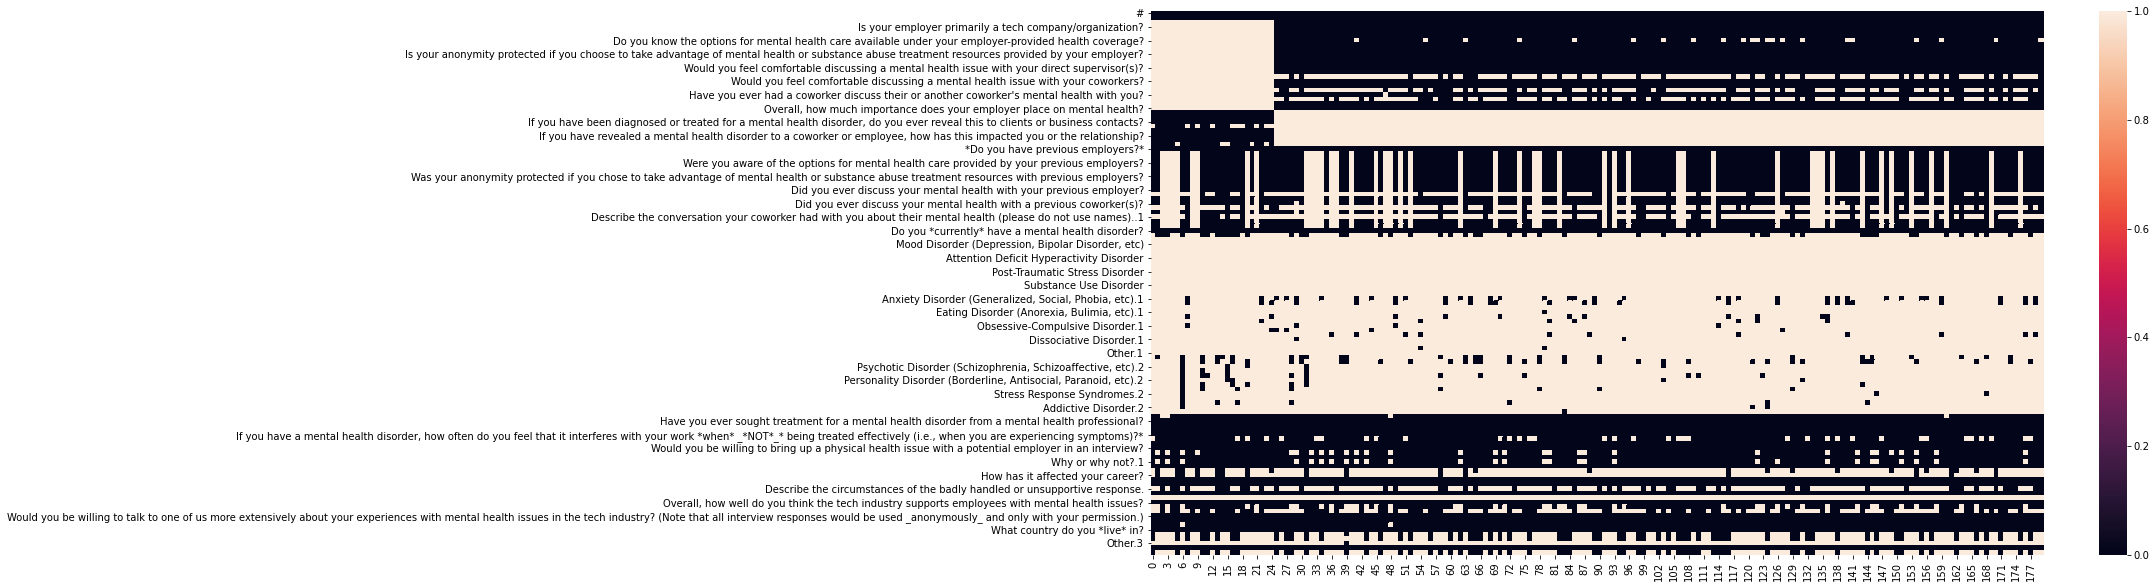

In [11]:
plt.figure(figsize=(20, 10))

heatmap_survey = surveyC1.transpose()
sns.heatmap(data = heatmap_survey.isnull());

# 2. Data cleaning and preprocessing

## 2.a Dropping the following columns:
- User ID
- Mental health disorder(mhd) columns
    - There are 3 types of columns for mhd. If we check the documentation, we can see the questions they're related to: 
        - "What disorder(s) have you been diagnosed with?" = "name_of_mhd" (e.g, "Addictive Disorder")
        - "If possibly, what disorder(s) do you believe you have?" = "name_of_mhd.1" (e.g, "Addictive Disorder.1")
        - "If so, what disorder(s) were you diagnosed with?" = "name_of_mhd.2" (e.g, "Addictive Disorder.2")
    - We'll be dropping the columns for the first type because none of the respondents gave an answer
- Open ended questions
- Any questions related to self-employed users, because it doesn't relate to the majority of other users

In [12]:
#Dropping mental health disorder
mhd_cols = [
    "Anxiety Disorder (Generalized, Social, Phobia, etc)",
    "Mood Disorder (Depression, Bipolar Disorder, etc)",
    "Psychotic Disorder (Schizophrenia, Schizoaffective, etc)",
    "Eating Disorder (Anorexia, Bulimia, etc)",
    "Attention Deficit Hyperactivity Disorder",
    "Personality Disorder (Borderline, Antisocial, Paranoid, etc)",
    "Obsessive-Compulsive Disorder",
    "Post-Traumatic Stress Disorder",
    "Stress Response Syndromes",
    "Dissociative Disorder",
    "Substance Use Disorder",
    "Addictive Disorder",
    "Other"
]

#Dropping open ended questions
open_ended_ques_cols = [
    "Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.",
    "Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.",
    "Describe the conversation with coworkers you had about your mental health including their reactions.",
    "Describe the conversation you had with your previous coworkers about your mental health including their reactions.",
    "Describe the conversation your coworker had with you about their mental health (please do not use names).",
    "Describe the conversation your coworker had with you about their mental health (please do not use names)..1",
    "Why or why not?",
    "Why or why not?.1",
    "Describe the circumstances of the badly handled or unsupportive response.",
    "Describe the circumstances of the supportive or well handled response.",
    "Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.",
    "If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so."
]

#Dropping questions related to self-employed users
self_emp_ques_cols = [
    "*Are you self-employed?*",
    "Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?",
    "Do you know local or online resources to seek help for a mental health issue?", 
    "If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?",
    "If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?",
    "If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?",
    "If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?",
    "Do you believe your productivity is ever affected by a mental health issue?",
    "If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?"
]

irrelevant_cols =[
    "#",
    "Other",
    "What country do you *live* in?",
    "What US state or territory do you *work* in?",
    "What US state or territory do you *live* in?",
]
surveyC1 = surveyC1.drop(mhd_cols + open_ended_ques_cols + self_emp_ques_cols + irrelevant_cols, axis=1)

#Dropping (rows) users who are self-employed
surveyC1 = surveyC1.drop(range(0, 25), axis=0)

#Reset survey index values 
surveyC1.index = np.arange(1, len(surveyC1) + 1)

## 2.b Renaming columns

In [13]:
#Change column names for easier use
surveyC1.rename(columns = {
                          "How many employees does your company or organization have?":"num_employees",
                          "Is your employer primarily a tech company/organization?":"is_tech_company",
                          "Is your primary role within your company related to tech/IT?":"is_role_in_tech",
                          "Does your employer provide mental health benefits as part of healthcare coverage?":"employer_mh_coverage",
                          "Do you know the options for mental health care available under your employer-provided health coverage?":"employer_options_in_mh_coverage",
                          "Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?":"employer_mh_disc",
                          "Does your employer offer resources to learn more about mental health disorders and options for seeking help?":"employer_offer_mh_res",
                          "Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?":"employer_mh_sa_anonimity",
                          "If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?":"employer_mh_leave_difficulty",
                          "Would you feel more comfortable talking to your coworkers about your physical health or your mental health?":"coworker_comfort_reveal_ph_mh_disc",
                          "Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?":"supervisor_comfort_mh_disc",
                          "Have you ever discussed your mental health with your employer?":"employer_reveal_mh_disc",
                          "Would you feel comfortable discussing a mental health issue with your coworkers?":"coworker_comfort_mh_disc",
                          "Have you ever discussed your mental health with coworkers?":"coworker_reveal_mh_disc",
                          "Have you ever had a coworker discuss their or another coworker's mental health with you?":"coworker_confine_mh_disc",
                          "Overall, how much importance does your employer place on physical health?":"employer_ph_importance",
                          "Overall, how much importance does your employer place on mental health?":"employer_mh_importance",
                          "*Do you have previous employers?*":"prev_employer",
                          "Was your employer primarily a tech company/organization?":"prev_employer_is_tech_company",
                          "Have your previous employers provided mental health benefits?":"prev_employer_mh_coverage",
                          "Were you aware of the options for mental health care provided by your previous employers?":"prev_employer_options_in_mh_coverage",
                          "Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?":"prev_employer_mh_disc",
                          "Did your previous employers provide resources to learn more about mental health disorders and how to seek help?":"prev_employer_offer_mh_res",
                          "Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?":"prev_employer_mh_sa_anonimity",
                          "Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?":"prev_employer_comfort_reveal_ph_mh_disc",
                          "Would you have been willing to discuss your mental health with your direct supervisor(s)?":"prev_supervisor_comfort_mh_disc",
                          "Did you ever discuss your mental health with your previous employer?":"prev_employer_reveal_mh_disc",
                          "Would you have been willing to discuss your mental health with your coworkers at previous employers?":"prev_coworker_comfort_mh_disc",
                          "Did you ever discuss your mental health with a previous coworker(s)?":"prev_coworker_mh_desc",
                          "Did you ever have a previous coworker discuss their or another coworker's mental health with you?":"prev_coworker_confine_mh_disc",
                          "Overall, how much importance did your previous employer place on physical health?":"prev_employer_ph_importance",
                          "Overall, how much importance did your previous employer place on mental health?":"prev_employer_mh_importance",
                          "Do you *currently* have a mental health disorder?":"currently_have_mh",
                          "Have you ever been *diagnosed* with a mental health disorder?":"diagnosed_mh",
                          "Post-traumatic Stress Disorder.1":"Post-traumatic Stress Disorder.2",
                          "Post-traumatic Stress Disorder":"Post-traumatic Stress Disorder.1",
                          "Have you had a mental health disorder in the past?":"past_mh",
                          "Have you ever sought treatment for a mental health disorder from a mental health professional?":"sought_mh_treatment",
                          "Do you have a family history of mental illness?":"mh_family_history",
                          "If you have a mental health disorder, how often do you feel that it interferes with your work *when being treated effectively?*":"mh_with_treatment_impact_on_work",
                          "If you have a mental health disorder, how often do you feel that it interferes with your work *when* _*NOT*_* being treated effectively (i.e., when you are experiencing symptoms)?*":"mh_with_no_treatment_impact_on_work",
                          "Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?":"others_mh_reveal_impact_on_mh_self_reveal",
                          "How willing would you be to share with friends and family that you have a mental illness?":"friends_fam_mh_reveal",
                          "Would you be willing to bring up a physical health issue with a potential employer in an interview?":"future_employer_ph_reveal",
                          "Would you bring up your *mental* health with a potential employer in an interview?":"future_employer_mh_reveal",
                          "Are you openly identified at work as a person with a mental health issue?":"identified_mh_at_work",
                          "Has being identified as a person with a mental health issue affected your career?":"identified_mh_at_work_has_effected",
                          "How has it affected your career?":"identified_mh_at_work_how_effected",
                          "If they knew you suffered from a mental health disorder, how do you think that your team members/co-workers would react?":"if_coworker_knew_of_my_mh_results",
                          "Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?":"mh_bad_response_at_work",
                          "Have you observed or experienced a *supportive or well handled response* to a mental health issue in your current or previous workplace?":"mh_positive_response_at_work_desc",
                          "Overall, how well do you think the tech industry supports employees with mental health issues?":"tech_industry_mh_support",
                          "Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used _anonymously_ and only with your permission.)":"survey_creators_comfort_reveal",
                          "What is your age?":"age",
                          "What is your gender?":"gender",
                          "What is your race?":"race",
                          "What country do you *work* in?":"country_work"
                         },
               inplace=True)

## 2.c Preprocessing

The following will be dealt separately because they require further examination:
- Company type and job role.
- Mental disorders.
- Gender.
- Race.

In [14]:
#A function to help us read the data on preprocessing step
"""
Prints the following information about a column:
Index, columns name, unique values, how many times a value appears and what data type it is, 
how many values area accounted for from the whole list, and lastly, how many NaN are accounted for form the whole list
"""

def evaluate_df_cols(df):
    for index, col in enumerate(df):
        print()
        print("Index position: {}, Column name: {}".format(index, col))
        print()
        
        unique_vals = df[col].unique()
        print("Unique values:\n", unique_vals)
        print()
        print("Frequency of values and data type:\n{}".format(df[col].value_counts()))
        print()
        print("Total value count in column: {}/{}".format(df[col].value_counts().sum(), len(df)))
        print()
        
        nans = df[col].isna().sum()
        print("Total NaNs in column: {}".format(nans))
        print()
        print("-"*50)

In [15]:
evaluate_df_cols(surveyC1)


Index position: 0, Column name: num_employees

Unique values:
 ['More than 1000' '500-1000' 'Jun-25' '26-100' '100-500' '01-May']

Frequency of values and data type:
More than 1000    72
26-100            28
100-500           24
500-1000          20
Jun-25            10
01-May             1
Name: num_employees, dtype: int64

Total value count in column: 155/155

Total NaNs in column: 0

--------------------------------------------------

Index position: 1, Column name: is_tech_company

Unique values:
 [0. 1.]

Frequency of values and data type:
1.0    97
0.0    58
Name: is_tech_company, dtype: int64

Total value count in column: 155/155

Total NaNs in column: 0

--------------------------------------------------

Index position: 2, Column name: is_role_in_tech

Unique values:
 [1. 0.]

Frequency of values and data type:
1.0    141
0.0     14
Name: is_role_in_tech, dtype: int64

Total value count in column: 155/155

Total NaNs in column: 0

---------------------------------------------

In [16]:
#N/A values will be replaced with -1. That way "No" will always start as "0" and the more positive the response the higher
#numeric value it has

def replace_col_and_val(col_data, col_name, has_na=False, is_val_binary=False, is_val_3_maybe=False, is_val_3_dk=False):
    
    if has_na:
        surveyC1[col_name] = surveyC1[col_name].fillna(-1)
    
    if is_val_binary:
        col_data = {
            "Yes":1,
            "No":0
        }
    
    if is_val_3_maybe:
        col_data = {
            "Yes":2,
            "Maybe":1,
            "No":0
        }
        
    if is_val_3_dk:
        col_data = {
            "Yes":2,
            "I don't know":1,
            "No":0
        }
        
    surveyC1[col_name] = surveyC1[col_name].replace(col_data)

In [17]:
#Replace values of: "num_employees"
col_data = {
    "01-May":1, #Most likely an error, May is the 5th month so it's safe to assume that the range is "01-05"
    "Jun-25":6, #Most likely an error, June is the 6th month so it's safe to assume that the range is "06-25"
    "26-100":26,
    "100-500":101,
    "500-1000":501,
    "More than 1000":1001
}
replace_col_and_val(col_data, col_name="num_employees")

#Replace values of: "employer_mh_coverage"
col_data = {
    "Yes":2,
    "I don't know":1,
    "No":0,
    "Not eligible for coverage / NA":-1,
}
replace_col_and_val(col_data, col_name = "employer_mh_coverage")

#Replace values of: "employer_options_in_mh_coverage"
replace_col_and_val(col_data, col_name="employer_options_in_mh_coverage", has_na=True, is_val_binary=True)

#Replace values of: "employer_mh_disc"
replace_col_and_val(col_data, col_name="employer_mh_disc", has_na=True, is_val_3_dk=True)

#Replace values of: "employer_offer_mh_res"
replace_col_and_val(col_data, col_name="employer_offer_mh_res", is_val_3_dk=True)

#Replace values of: "employer_mh_sa_anonimity"
replace_col_and_val(col_data, col_name="employer_mh_sa_anonimity", is_val_3_dk=True)

#Replace values of: "employer_mh_leave_difficulty"
col_data ={
    "Very easy": 5,
    "Somewhat easy":4,
    "Neither easy nor difficult":3,
    "I don't know": 3,
    "Somewhat difficult":2,
    "Difficult":1,
}
replace_col_and_val(col_data, col_name="employer_mh_leave_difficulty")

#Replace values of: "coworker_comfort_reveal_ph_mh_disc"
col_data = {
    "Physical health":2,
    "Mental health":1,
    "Same level of comfort for each":0
}
replace_col_and_val(col_data, col_name="coworker_comfort_reveal_ph_mh_disc")

#Replace values of: "supervisor_comfort_mh_disc"
replace_col_and_val(col_data, col_name="supervisor_comfort_mh_disc", is_val_3_maybe=True)

#No need to replace values of: "employer_reveal_mh_disc", they're already numerical, 0 for "No", 1 for "Yes"

#Replace values for: "coworker_comfort_mh_disc"
replace_col_and_val(col_data, col_name="coworker_comfort_mh_disc", is_val_3_maybe=True)

#No need to replace values of: "coworker_reveal_mh_disc", they're already numerical

#Replace values for: "coworker_confine_mh_disc"
replace_col_and_val(col_data, col_name="coworker_confine_mh_disc", has_na=True)

#No need to replace values of: "employer_ph_importance", they're already numerical, scale from 0-10

#No need to replace values of: "employer_mh_importance", they're already numerical, scale from 0-10

#No need to replace values of: "prev_employer", they're already numerical, 0 for "No", 1 for "Yes"

#Replace values for: "prev_employer_is_tech_company"
replace_col_and_val(col_data, col_name="prev_employer_is_tech_company", has_na=True)

#Replace values for: "prev_employer_mh_coverage"
col_data = {
    "Yes, they all did":2,
    "Some did":1,
    "I don't know":1,
    "No, none did":0
}
replace_col_and_val(col_data, col_name="prev_employer_mh_coverage", has_na=True)

#Replace values for: "prev_employer_options_in_mh_coverage"
col_data = {
    "Yes, I was aware of all of them":2,
    "I was aware of some":1, 
    "No, I only became aware later":0,
    "N/A (none offered)":-1,
    "N/A (was not aware)":-1
}
replace_col_and_val(col_data, col_name="prev_employer_options_in_mh_coverage", has_na=True)

#Replace values for: "prev_employer_mh_disc"
col_data = {
    "Yes, they all did":2,
    "Some did":1,
    "I don't know":1,
    "None did":0
}
replace_col_and_val(col_data, col_name="prev_employer_mh_disc", has_na=True)

#Replace values for: "prev_employer_offer_mh_res"
col_data = {
    "Yes, they all did":2,
    "Some did":1,
    "None did":0
}
replace_col_and_val(col_data, col_name="prev_employer_offer_mh_res", has_na=True)

#Replace values for: "prev_employer_mh_sa_anonimity"
col_data = {
    "Yes, always": 2,
    "Sometimes":1,
    "I don't know":1,
    "No":0
}
replace_col_and_val(col_data, col_name="prev_employer_mh_sa_anonimity", has_na=True)

#Replace values for: "prev_employer_comfort_reveal_ph_mh_disc"
col_data = {
    "Mental health":2,
    "Physical health":1,
    "Same level of comfort for each":0
}
replace_col_and_val(col_data, col_name="prev_employer_comfort_reveal_ph_mh_disc", has_na=True)

#Replace values for: "prev_supervisor_comfort_mh_disc"
col_data = {
    "Yes, all of my previous supervisors":2,
    "I don't know":1,
    "Some of my previous supervisors":1,
    "No, none of my previous supervisors":0
}
replace_col_and_val(col_data, col_name="prev_supervisor_comfort_mh_disc", has_na=True)

#Replace values for: "prev_employer_reveal_mh_disc"
replace_col_and_val(col_data, col_name="prev_employer_reveal_mh_disc", has_na=True)

#Replace values for: "prev_coworker_comfort_mh_disc"
col_data = {
    "Yes, at all of my previous employers":2,
    "At some of my previous employers":1,
    "No, at none of my previous employers":0
}
replace_col_and_val(col_data, col_name="prev_coworker_comfort_mh_disc", has_na=True)

#Replace values for: "prev_coworker_mh_desc"
replace_col_and_val(col_data, col_name="prev_coworker_mh_desc", has_na=True)

#Replace values for: "prev_coworker_confine_mh_disc"
replace_col_and_val(col_data, col_name="prev_coworker_confine_mh_disc", has_na=True)

#Replace values for: "prev_employer_ph_importance"
replace_col_and_val(col_data, col_name="prev_employer_ph_importance", has_na=True) #Scale from 0-10

#Replace values for: "prev_employer_mh_importance"
replace_col_and_val(col_data, col_name="prev_employer_mh_importance", has_na=True) #Scale from 0-10

#Replace values for: "currently_have_mh"
col_data = {
    "Yes":2,
    "Possibly":1,
    "Don't Know":1,
    "No":0
}
replace_col_and_val(col_data, col_name="currently_have_mh")

#Replace values for: "diagnosed_mh"
replace_col_and_val(col_data, col_name="diagnosed_mh", has_na=True, is_val_binary=True)

#Replace values for: "past_mh"
col_data = {
    "Yes":2,
    "Possibly":1,
    "Don't Know":1,
    "No":0
}
surveyC1["past_mh"] = surveyC1["past_mh"].fillna(0)
replace_col_and_val(col_data, col_name="past_mh")

#No need to replace values of: "sought_mh_treatment", they're already numerical, 0 for "No", 1 for "Yes" ## Target value

#Replace values for: "mh_family_history"
replace_col_and_val(col_data, col_name="mh_family_history", is_val_3_dk=True)

#Replace values for: "mh_with_treatment_impact_on_work"
col_data = {
    "Often":3,
    "Sometimes":2,
    "Rarely":1,
    "Never":0,
    "Not applicable to me":-1
}
replace_col_and_val(col_data, col_name="mh_with_treatment_impact_on_work")

#Replace values for: "mh_with_no_treatment_impact_on_work"
col_data = {
    "Often":3,
    "Sometimes":2,
    "Rarely":1,
    "Never":0,
    "Not applicable to me":-1
}
replace_col_and_val(col_data, col_name="mh_with_no_treatment_impact_on_work")

#Replace values for: "others_mh_reveal_impact_on_mh_self_reveal"
replace_col_and_val(col_data, col_name="others_mh_reveal_impact_on_mh_self_reveal", has_na=True, is_val_3_maybe=True)

#No need to replace values of: "friends_fam_mh_reveal", they're already numerical, scale from 0-10

#Replace values for: "future_employer_ph_reveal"
replace_col_and_val(col_data, col_name="future_employer_ph_reveal", is_val_3_maybe=True)

#Replace values for: "future_employer_mh_reveal"
replace_col_and_val(col_data, col_name="future_employer_mh_reveal", is_val_3_maybe=True)

#No need to replace values of: "future_employer_mh_reveal", they're already numerical, 0 for "No", 1 for "Yes"

#Replace values for: "identified_mh_at_work_has_effected"
replace_col_and_val(col_data, col_name="identified_mh_at_work_has_effected", has_na=True)

#Replace values for: "identified_mh_at_work_how_effected"
replace_col_and_val(col_data, col_name="identified_mh_at_work_how_effected", has_na=True)

#No need to replace values of: "if_coworker_knew_of_my_mh_results", they're already numerical, scale from 0-10

#Replace values for: "mh_bad_response_at_work"
col_data = {
    "Yes, I experienced":3,
    "Yes, I observed":2,
    "Maybe/Not sure":1,
    "No":0
}
replace_col_and_val(col_data, col_name="mh_bad_response_at_work")

#Replace values for: "mh_positive_response_at_work_desc"
col_data = {
    "Yes, I experienced":3,
    "Yes, I observed":2,
    "Maybe/Not sure":1,
    "No":0
}
replace_col_and_val(col_data, col_name="mh_positive_response_at_work_desc")

#Replace values for: "tech_industry_mh_support"
replace_col_and_val(col_data, col_name="mh_positive_response_at_work_desc")

#Replace values for: "tech_industry_mh_support"
col_data = {
    "5":4,
    "4":3,
    "3":2,
    "2":1,
    "1":0
}
replace_col_and_val(col_data, col_name="mh_positive_response_at_work_desc")

#No need to replace values of: "survey_creators_comfort_reveal", they're already numerical, 0 for "No", 1 for "Yes"

## 2.c Company type and job role

In [18]:
#It seems that 97 companies are in tech
surveyC1["is_tech_company"].value_counts()

1.0    97
0.0    58
Name: is_tech_company, dtype: int64

In [19]:
#Only 14 people don't consider their roles being in tech/IT
#This is a better representation of what we're looking for
surveyC1["is_role_in_tech"].value_counts()

1.0    141
0.0     14
Name: is_role_in_tech, dtype: int64

In [20]:
#We'll drop the 14 whose primary job role isn't tech/IT
surveyC1 = surveyC1[surveyC1["is_role_in_tech"].isin([1])]
surveyC1.shape

(141, 82)

In [21]:
#Next, we'll drop "is_tech_company" and rename "is_role_in_tech" 
surveyC1 = surveyC1.drop(["is_tech_company"], axis=1)
surveyC1 = surveyC1.rename(columns={"is_role_in_tech":"is_comp_role_in_tech"})

## 2.c Age

#### Check if there are any outliers: minors or retired employees (>65)

In [22]:
age_col = surveyC1["age"].unique()
#print("Minimum age is: {}, Maximum age is: {}".format(age_col.min(), age_col.max()))

if age_col.min() < 18:
    print("There minors in the dataset.")
    print("They are {}.".format(age_col.min()))
else: 
    print("There aren't any minors in the dataset.")
    print("The youngest is {}.".format(age_col.min()))
    
print("-"*50)

if age_col.max() > 65:
    print("There are retired employees.")
    print("They are {}.".format(age_col.max()))
else:
    print("There aren't any retired employees.")
    print("They oldest is {}.".format(age_col.max()))

There aren't any minors in the dataset.
The youngest is 20.
--------------------------------------------------
There aren't any retired employees.
They oldest is 62.


## 2.c Mental disorders

#### Endoce mental disorders: 1 for having a specific disorder and 0 for not having a specific disorder

In [23]:
mh_list = [
    "Anxiety Disorder (Generalized, Social, Phobia, etc).1",
    "Mood Disorder (Depression, Bipolar Disorder, etc).1",
    "Psychotic Disorder (Schizophrenia, Schizoaffective, etc).1",
    "Eating Disorder (Anorexia, Bulimia, etc).1",
    "Attention Deficit Hyperactivity Disorder.1",
    "Personality Disorder (Borderline, Antisocial, Paranoid, etc).1",
    "Obsessive-Compulsive Disorder.1",
    "Post-traumatic Stress Disorder.1",
    "Stress Response Syndromes.1",
    "Dissociative Disorder.1",
    "Substance Use Disorder.1",
    "Addictive Disorder.1",
    "Other.1", 
    "Anxiety Disorder (Generalized, Social, Phobia, etc).2",
    "Mood Disorder (Depression, Bipolar Disorder, etc).2",
    "Psychotic Disorder (Schizophrenia, Schizoaffective, etc).2",
    "Eating Disorder (Anorexia, Bulimia, etc).2",
    "Attention Deficit Hyperactivity Disorder.2",
    "Personality Disorder (Borderline, Antisocial, Paranoid, etc).2",
    "Obsessive-Compulsive Disorder.2",
    "Post-traumatic Stress Disorder.2",
    "Stress Response Syndromes.2",
    "Dissociative Disorder.2",
    "Substance Use Disorder.2",
    "Addictive Disorder.2",
    "Other.2"
]

for i in range(len(mh_list)):
    surveyC1[[mh_list[i]]] = surveyC1[[mh_list[i]]].applymap(lambda x: 0 if pd.isnull(x) else 1)

## 2.c Gender

#### Make all values to lowercase and see the unique values

In [24]:
surveyC1["gender"] = surveyC1["gender"].str.lower()
surveyC1["gender"].unique()

array(['male', 'female', 'm', 'f', 'woman', nan, 'female, she/her',
       'mostly male', 'cisgender male'], dtype=object)

#### Encode gender 

In [25]:
male_str = ["male", "mail", "m", "mostyl male", "mostly male", "cisgender male"]
fmale_str = ["female", "f", "woman", "she/her", "female, she/her"]

#Iterate through dataset and change the values
for (row, column) in surveyC1.iterrows():
    if column["gender"] in male_str:
        surveyC1["gender"].replace(to_replace=column["gender"],
                                              value=1, inplace=True)
    elif column["gender"] in fmale_str:
        surveyC1["gender"].replace(to_replace=column["gender"],
                                               value=2, inplace=True)
    else: 
        surveyC1["gender"].fillna(3, inplace=True)

In [26]:
surveyC1["gender"].value_counts()

1    95
2    45
3     1
Name: gender, dtype: int64

## 2.c Race

In [27]:
#Change NaN to "I prefer not to answer"
surveyC1["race"].fillna("I prefer not to answer", inplace=True)

In [28]:
#Check which user inserted Latino, there should be a race column 
surveyC1.loc[surveyC1["Other.3"] == "Latino "] #Gets more information about the user

,num_employees,is_comp_role_in_tech,employer_mh_coverage,employer_options_in_mh_coverage,employer_mh_disc,employer_offer_mh_res,employer_mh_sa_anonimity,employer_mh_leave_difficulty,coworker_comfort_reveal_ph_mh_disc,supervisor_comfort_mh_disc,employer_reveal_mh_disc,coworker_comfort_mh_disc,coworker_reveal_mh_disc,coworker_confine_mh_disc,employer_ph_importance,employer_mh_importance,prev_employer,prev_employer_is_tech_company,prev_employer_mh_coverage,prev_employer_options_in_mh_coverage,prev_employer_mh_disc,prev_employer_offer_mh_res,prev_employer_mh_sa_anonimity,prev_employer_comfort_reveal_ph_mh_disc,prev_supervisor_comfort_mh_disc,prev_employer_reveal_mh_disc,prev_coworker_comfort_mh_disc,prev_coworker_mh_desc,prev_coworker_confine_mh_disc,prev_employer_ph_importance,prev_employer_mh_importance,currently_have_mh,diagnosed_mh,"Anxiety Disorder (Generalized, Social, Phobia, etc).1","Mood Disorder (Depression, Bipolar Disorder, etc).1","Psychotic Disorder (Schizophrenia, Schizoaffective, etc).1","Eating Disorder (Anorexia, Bulimia, etc).1",Attention Deficit Hyperactivity Disorder.1,"Personality Disorder (Borderline, Antisocial, Paranoid, etc).1",Obsessive-Compulsive Disorder.1,Post-traumatic Stress Disorder.1,Stress Response Syndromes.1,Dissociative Disorder.1,Substance Use Disorder.1,Addictive Disorder.1,Other.1,"Anxiety Disorder (Generalized, Social, Phobia, etc).2","Mood Disorder (Depression, Bipolar Disorder, etc).2","Psychotic Disorder (Schizophrenia, Schizoaffective, etc).2","Eating Disorder (Anorexia, Bulimia, etc).2",Attention Deficit Hyperactivity Disorder.2,"Personality Disorder (Borderline, Antisocial, Paranoid, etc).2",Obsessive-Compulsive Disorder.2,Post-traumatic Stress Disorder.2,Stress Response Syndromes.2,Dissociative Disorder.2,Substance Use Disorder.2,Addictive Disorder.2,Other.2,past_mh,sought_mh_treatment,mh_family_history,mh_with_treatment_impact_on_work,mh_with_no_treatment_impact_on_work,others_mh_reveal_impact_on_mh_self_reveal,friends_fam_mh_reveal,future_employer_ph_reveal,future_employer_mh_reveal,identified_mh_at_work,identified_mh_at_work_has_effected,identified_mh_at_work_how_effected,if_coworker_knew_of_my_mh_results,mh_bad_response_at_work,mh_positive_response_at_work_desc,tech_industry_mh_support,survey_creators_comfort_reveal,age,gender,race,Other.3,country_work
15,1001,1.0,2,1,2,2,1,4,2,2,1.0,1,1.0,1.0,8.0,7.0,1,0.0,0,-1,0,0,1,1,1,0.0,1,1.0,0.0,7.0,5.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,2,1,1,2,3,2,9,2,1,1,1.0,4.0,5,3,3,3,0,34,1,I prefer not to answer,Latino,United States of America


In [29]:
#Fill in "Latino" value for user 39 in race column
surveyC1.loc[[39], "race"] = "Latino"

In [30]:
#Drop "Other.3" column
surveyC1 = surveyC1.drop("Other.3", axis=1)

In [31]:
surveyC1["race"].unique()

array(['White', 'I prefer not to answer', 'More than one of the above',
       'Asian', 'Latino', 'Black or African American'], dtype=object)

# 3. Visualizations

TODO:
- Categories the visualizations into: respondents (location, age, gender)
- Expirience of md on work (insights)
- Mental disroders distribution
- Gender and currently have disorder
- Company size and currently have disorder / currently have disorder

## 3.a Profile of the respondents

### Gender across country
- While it's clear that most of the respondents are from USA, we can see that 2/3 of tech  workers are male. 

<Figure size 576x504 with 0 Axes>

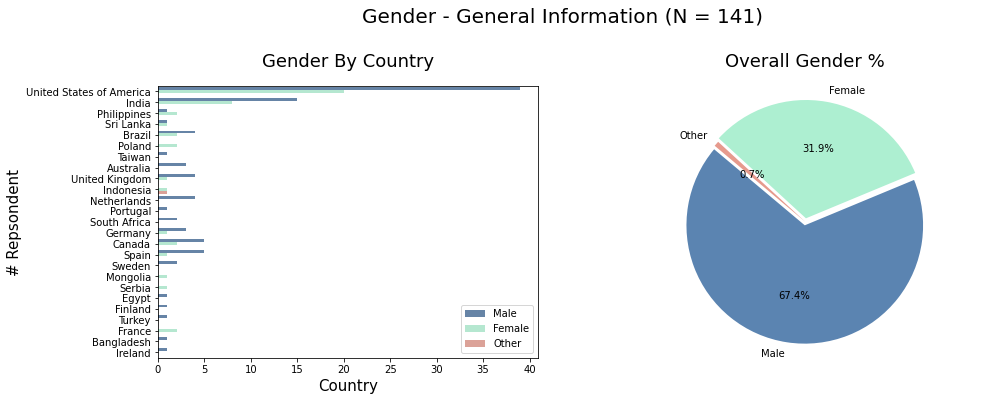

In [32]:
plt.figure(figsize=(8,7))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(15)
fig.suptitle("Gender - General Information (N = {})".format(len(surveyC1)), fontsize=20, y=1.1)

#Pie chart
total_respondents = surveyC1["is_comp_role_in_tech"].count()
male = surveyC1[(surveyC1["is_comp_role_in_tech"]==1) & (surveyC1["gender"]==1)]["gender"].count()
female = surveyC1[(surveyC1["is_comp_role_in_tech"]==1) & (surveyC1["gender"]==2)]["gender"].count()
other = surveyC1[(surveyC1["is_comp_role_in_tech"]==1) & (surveyC1["gender"]==3)]["gender"].count()

labels = "Male", "Female", "Other"
sizes = [male/total_respondents, female/total_respondents, other/total_respondents]
explode = (0.03, 0.03, 0)
colors = ["#5b84b1", "#adefd1", "#e69a8d"]

#Bar plot
sns.countplot(y=surveyC1[surveyC1["is_comp_role_in_tech"]==1]["country_work"], hue=surveyC1["gender"], ax=ax1, palette=colors)
ax1.set_title("Gender By Country", fontsize=18, y=1.05)
ax1.set_xlabel("Country", fontsize=15)
ax1.set_ylabel("# Repsondent", fontsize=15)
ax1.legend(loc="lower right", labels=["Male", "Female", "Other"])

ax2.pie(sizes, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", startangle=140, normalize=False)
ax2.axis("equal")
ax2.set_title("Overall Gender %", fontsize=18, y=1.05)

plt.show()

### How old are the respondents?

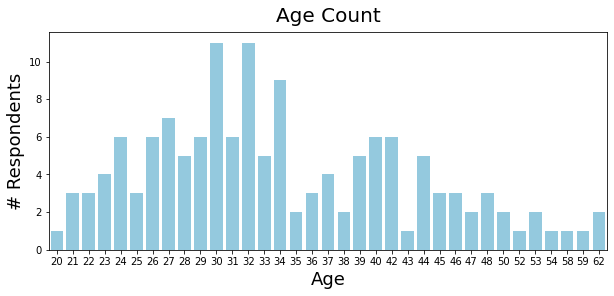

In [33]:
plt.figure(figsize=(10, 4))
sns.countplot(x=surveyC1["age"], color="skyblue")
plt.title("Age Count", fontsize=20, y=1.02)
plt.ylabel("# Respondents", fontsize=18)
plt.xlabel("Age", fontsize=18)

plt.show()

### Mental health status across gender and age

- We can infer from the plots (current and past mental disorders) that in men and women, there's a considerable amount of respondents that don't know whether or not they have a mental health issue. This is alarming because it points out to the lack of resources that can help them correctly identify the issue.


- The **rows** represent the gender:
    - **First** row show us the **"male"**(gender=1) distribution
    - **Second** row show us the **"female"**(gender=2) distribution
    - **Third** row show us the **"other"**(gender=3) distribution
    
    
- The **columns** represent the status of "currenlty having a mental health disorder" / "Had mental a disorder in the past"
    - **First** column shows us the the distribution of **currently not having a mental disorder** / **didn't had a mental disorder in the past**
    - **Second** column shows us the the distribution of **currently maybe having a mental disorder** / **maybe had a mental disorder in the past**
    - **Third** column shows us the the distribution of **currently having a mental disorder** / **had a mental disorder in the past**

In [34]:
def mh_stats_plot(df=surveyC1, row="gender", col=None, x="age", color="skyblue", xlabel="Age", ylabel="# Respondents",
                  figs_loc_top=0.9, plot_title=None):
    g = sns.FacetGrid(df, row=row, col=col)
    g.map_dataframe(sns.histplot, x=x, color=color)
    g.set_axis_labels(xlabel, ylabel, fontsize=16)
    g.fig.subplots_adjust(top=figs_loc_top)
    g.fig.suptitle(plot_title, fontsize=20)
    plt.show()

**Currently have mental disorder**

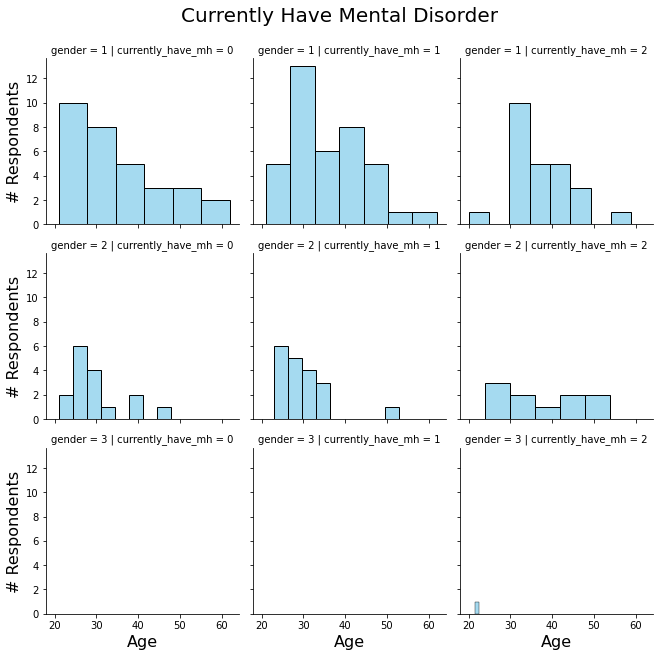

In [35]:
mh_stats_plot(col="currently_have_mh", plot_title="Currently Have Mental Disorder")

**Had mental a disorder in the past**

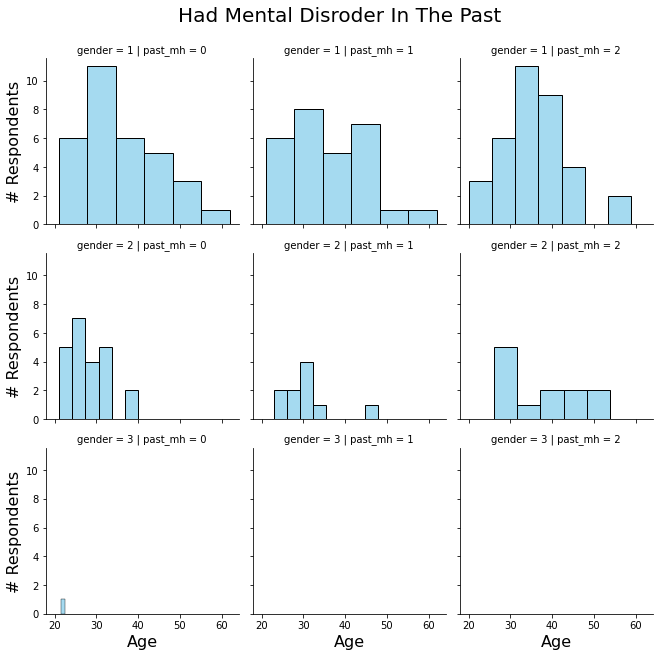

In [36]:
mh_stats_plot(col="past_mh", plot_title="Had Mental Disroder In The Past")

### Mental health distribution

TODO: 
- Distribution of respondents "believe" of having a certain md
- Distribution of respondents "disgnosed" of having a certain md

"If possibly, what disorder(s) do you believe you have?" = "name_of_mhd.1" (e.g, "Addictive Disorder.1")

"If so, what disorder(s) were you diagnosed with?" = "name_of_mhd.2" (e.g, "Addictive Disorder.2")

- 34 - diagnosed
- 2 - not diagnosed
- 105 - na


Asses who and when respondents were asked about md "believe" or "diagnosed. If it's the same people or not

In [76]:
list = {
    "Anxiety Disorder (Generalized, Social, Phobia, etc).1",
    "Mood Disorder (Depression, Bipolar Disorder, etc).1",
    "Psychotic Disorder (Schizophrenia, Schizoaffective, etc).1",
    "Eating Disorder (Anorexia, Bulimia, etc).1",
    "Attention Deficit Hyperactivity Disorder.1",
    "Personality Disorder (Borderline, Antisocial, Paranoid, etc).1",
    "Obsessive-Compulsive Disorder.1",
    "Post-traumatic Stress Disorder.1",
    "Stress Response Syndromes.1",
    "Dissociative Disorder.1",
    "Substance Use Disorder.1",
    "Addictive Disorder.1",
    "Other.1"
}

In [94]:
believed_columns = surveyC1.filter(regex="1$", axis=1)#MHD columns that respondents believe they have
believed_columns.sum()
#believed_df.iloc[:, 0]

Anxiety Disorder (Generalized, Social, Phobia, etc).1             29
Mood Disorder (Depression, Bipolar Disorder, etc).1               20
Psychotic Disorder (Schizophrenia, Schizoaffective, etc).1         0
Eating Disorder (Anorexia, Bulimia, etc).1                         0
Attention Deficit Hyperactivity Disorder.1                         9
Personality Disorder (Borderline, Antisocial, Paranoid, etc).1     5
Obsessive-Compulsive Disorder.1                                    3
Post-traumatic Stress Disorder.1                                   4
Stress Response Syndromes.1                                        9
Dissociative Disorder.1                                            2
Substance Use Disorder.1                                           0
Addictive Disorder.1                                               0
Other.1                                                            0
dtype: int64

# 4. Classifiers

## Evaluating the model

#### Check If the dataset is balanced
- If the dataset is balanced then we'll use accuracy as the evaluation score

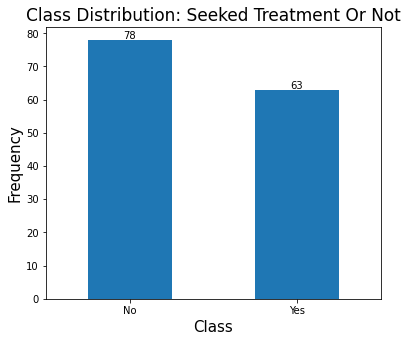

55.32% seeked treatment
44.68% didn't seek any treatment


In [33]:
class_names = ["No", "Yes"]
count_class = pd.value_counts(surveyC1["sought_mh_treatment"], sort=True)

plt.figure(figsize=(6,5))
ax = count_class.plot(kind="bar", rot=0)
for p in ax.patches:                 
    ax.annotate(np.round(p.get_height()),(p.get_x()+p.get_width()/2., p.get_height()),
        ha='center', va='center', xytext=(0, 4), textcoords='offset points')
plt.title("Class Distribution: Seeked Treatment Or Not", fontsize=17)
plt.xticks(range(2), class_names)
plt.xlabel("Class", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.show()

print("{:.2f}% seeked treatment".format((surveyC1["sought_mh_treatment"].value_counts()[0]/len(surveyC1["sought_mh_treatment"]))*100))
print("{:.2f}% didn't seek any treatment".format((surveyC1["sought_mh_treatment"].value_counts()[1]/len(surveyC1["sought_mh_treatment"]))*100))

#### Great news! It seems that our dataset is balanced.

### Metrics - Evaluate the model

**We'll use the following metrics to assess each classifier**
- **Confusion matrix** helps us determine the performance (accuracy) of the classification model. 
    - The higher the points are on diagonal line, from top left to bottom right, the better. This indicates many correct predictions, while off diagonal elements are mislabeld by the classifier. 
- **Precision (accuracy)** defines how accurate the model is by calculating the ratio between the correctly predicted positive observations ($TP$) from the total predicted positive observations ($TP + FP$). In short, it's the accuracy of the positive predictions.
    - $precision = \frac{TP}{TP + FP}$


- **Recall (sensitivity)** defines the ratio between the correctly predicted positive observations ($TP$) to all of the observations in the class ($TP + FN$). Also called as the ***True Positive Rate (TPR)***.

    - $recall = \frac{TP}{TP + FN}$


- **F1 Score** is the weighted average of precision and recall. That is, the combination of precision and recall (_harmonic mean_). The regular mean treats all values equally, whereas the _harmonic mean_ give more weight to low values. **Thus, we only get a high $F_1$ Score if both precision and recall are high**.
    - $F_1 = \frac{2}{\frac{1}{precision} + \frac{1}{recall}} = 2 \times \frac{precision \times recall}{precision + recall} = \frac{TP}{TP + \frac{FN + FP}{2}}$

**Since this is a binary classification problem,  we'll be using the ROC curve and AUC to compare the performance of our selected models**

- **ROC curve** summarizes and illsutrates the predictions performance of a classification model accross all classifications thresholds. The ROC curve plots the **False Positive Rate (FPR)** on the x axis while the **True Positive Rate (TPR)** is on the y axis.
    - $TPR(sensitivity) = \frac{TP}{TP + FN}$
    - $FPR(1 - specificity) = \frac{FP}{TN + FP}$
- **AUC** (area under the curve) shows how are model is able to distinguish between the classes. A perfect ROC AUC will equal to 1, while a random classifier will be equal to 0.5.

In [34]:
#Make X and y
#personal_list contains all personal information relating the user
personal_list = ["num_employees", "is_comp_role_in_tech", "prev_employer", "prev_employer_is_tech_company", "currently_have_mh", "diagnosed_mh",
                "past_mh", "mh_family_history", "friends_fam_mh_reveal", "age", "gender"]

#exp_list contains all past and current experience the user has relating mental health disorders
exp_list = ["employer_mh_coverage", "employer_options_in_mh_coverage", "employer_mh_disc", "employer_offer_mh_res",
            "employer_mh_sa_anonimity", "employer_mh_leave_difficulty", "coworker_comfort_reveal_ph_mh_disc", "supervisor_comfort_mh_disc",
            "employer_reveal_mh_disc", "coworker_comfort_mh_disc", "coworker_reveal_mh_disc", "coworker_confine_mh_disc",
            "employer_ph_importance", "employer_mh_importance", "prev_employer_mh_coverage", "prev_employer_options_in_mh_coverage",
            "prev_employer_mh_disc", "prev_employer_offer_mh_res", "prev_employer_mh_sa_anonimity", "prev_employer_comfort_reveal_ph_mh_disc",
            "prev_supervisor_comfort_mh_disc", "prev_employer_reveal_mh_disc", "prev_coworker_comfort_mh_disc", "prev_coworker_mh_desc",
            "prev_coworker_confine_mh_disc", "prev_employer_ph_importance", "prev_employer_mh_importance", "mh_with_treatment_impact_on_work",
            "mh_with_no_treatment_impact_on_work", "others_mh_reveal_impact_on_mh_self_reveal", "future_employer_ph_reveal", "future_employer_mh_reveal",
            "identified_mh_at_work", "identified_mh_at_work_has_effected", "identified_mh_at_work_how_effected", "if_coworker_knew_of_my_mh_results",
            "mh_bad_response_at_work", "mh_positive_response_at_work_desc"
           ]

features_col = personal_list + exp_list
target_col = "sought_mh_treatment"

surveyC2 = surveyC1.copy()
X = surveyC2[features_col]
y= surveyC2[target_col]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
def eval_model(model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, model_name=None):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    cm = plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, display_labels= class_names, colorbar=False)
    cm.figure_.suptitle("Confusion Matrix:")
    plt.show()
    
    print("-"*50)
    print("")
    print("Classification Report:\n")
    report = classification_report(y_test, y_pred)
    print(report)
    
    print("-"*50)
    
    print("")
    print("Accurracy Of {} Is: {:.2f}%".format(model_name ,accuracy_score(y_test, y_pred)*100))
    print("")
    print("-"*50)
    print("")
    
    score = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    print("Cross Validation Accuracy Scores On 5 Folds For {} Are:".format(model_name))
    print("")
    print("Lowest Accuracy Score: {:.2f}%".format(score.min()))
    print("Mean Accuracy Score: {:.2f}%".format(score.mean()))
    print("Highest Accuracy Score: {:.2f}%".format(score.max()))

# Train Classifiers

### Logistic Regression

- We'll try a Logistic Regression Classifier as our output classification is binary - seek treatment or not.
- Our dataset is small, thus we'll be using a _solver="liblinear"_

C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


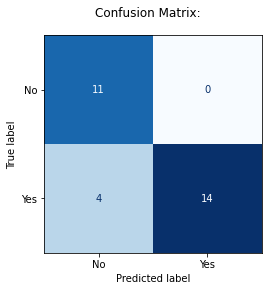

--------------------------------------------------

Classification Report:

              precision    recall  f1-score   support

           0       0.73      1.00      0.85        11
           1       1.00      0.78      0.88        18

    accuracy                           0.86        29
   macro avg       0.87      0.89      0.86        29
weighted avg       0.90      0.86      0.86        29

--------------------------------------------------

Accurracy Of Logistic Regression Is: 86.21%

--------------------------------------------------



C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Cross Validation Accuracy Scores On 5 Folds For Logistic Regression Are:

Lowest Accuracy Score: 0.78%
Mean Accuracy Score: 0.90%
Highest Accuracy Score: 0.95%


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
#Logistic Regression
logr_clf = LogisticRegression(random_state=42)
eval_model(model=logr_clf, model_name="Logistic Regression")

In [38]:
logr_params = {
    "solver":["liblinear", "lbfgs"],
    "max_iter":range(100, 400, 50),
    "C":range(1, 10)
}

In [39]:
logr_search = GridSearchCV(logr_clf, logr_params, cv=5, verbose=3, scoring="accuracy")
logr_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END ............C=1, max_iter=100, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=1, max_iter=100, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=1, max_iter=100, solver=liblinear; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 4/5] END ............C=1, max_iter=100, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=1, max_iter=100, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=1, max_iter=100, solver=lbfgs; total time=   0.0s
[CV 2/5] END ................C=1, max_iter=100, solver=lbfgs; total time=   0.0s
[CV 3/5] END ................C=1, max_iter=100, solver=lbfgs; total time=   0.0s
[CV 4/5] END ................C=1, max_iter=100, solver=lbfgs; total time=   0.0s
[CV 5/5] END ................C=1, max_iter=100, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=1, max_iter=150, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=1, max_iter=150, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=1, max_iter=150, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=1, max_iter=150, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=1, max_iter=150, solver=liblinear; total time=   0.0s
[CV 1/5] END ...............

C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 2/5] END ................C=1, max_iter=150, solver=lbfgs; total time=   0.0s
[CV 3/5] END ................C=1, max_iter=150, solver=lbfgs; total time=   0.0s
[CV 4/5] END ................C=1, max_iter=150, solver=lbfgs; total time=   0.0s
[CV 5/5] END ................C=1, max_iter=150, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=1, max_iter=200, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=1, max_iter=200, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=1, max_iter=200, solver=liblinear; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 4/5] END ............C=1, max_iter=200, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=1, max_iter=200, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=1, max_iter=200, solver=lbfgs; total time=   0.0s
[CV 2/5] END ................C=1, max_iter=200, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 3/5] END ................C=1, max_iter=200, solver=lbfgs; total time=   0.0s
[CV 4/5] END ................C=1, max_iter=200, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 5/5] END ................C=1, max_iter=200, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=1, max_iter=250, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=1, max_iter=250, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=1, max_iter=250, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=1, max_iter=250, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=1, max_iter=250, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=1, max_iter=250, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 2/5] END ................C=1, max_iter=250, solver=lbfgs; total time=   0.0s
[CV 3/5] END ................C=1, max_iter=250, solver=lbfgs; total time=   0.0s

C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_


[CV 4/5] END ................C=1, max_iter=250, solver=lbfgs; total time=   0.0s
[CV 5/5] END ................C=1, max_iter=250, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=1, max_iter=300, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=1, max_iter=300, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=1, max_iter=300, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=1, max_iter=300, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=1, max_iter=300, solver=liblinear; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ................C=1, max_iter=300, solver=lbfgs; total time=   0.0s

C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_


[CV 2/5] END ................C=1, max_iter=300, solver=lbfgs; total time=   0.0s
[CV 3/5] END ................C=1, max_iter=300, solver=lbfgs; total time=   0.0s
[CV 4/5] END ................C=1, max_iter=300, solver=lbfgs; total time=   0.0s
[CV 5/5] END ................C=1, max_iter=300, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=1, max_iter=350, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=1, max_iter=350, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=1, max_iter=350, solver=liblinear; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ............C=1, max_iter=350, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=1, max_iter=350, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=1, max_iter=350, solver=lbfgs; total time=   0.0s
[CV 2/5] END ................C=1, max_iter=350, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 3/5] END ................C=1, max_iter=350, solver=lbfgs; total time=   0.0s
[CV 4/5] END ................C=1, max_iter=350, solver=lbfgs; total time=   0.0s
[CV 5/5] END ................C=1, max_iter=350, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=2, max_iter=100, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=2, max_iter=100, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=2, max_iter=100, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=2, max_iter=100, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=2, max_iter=100, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=2, max_iter=100, solver=lbfgs; total time=   0.0s
[CV 2/5] END ................C=2, max_iter=100, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 3/5] END ................C=2, max_iter=100, solver=lbfgs; total time=   0.0s
[CV 4/5] END ................C=2, max_iter=100, solver=lbfgs; total time=   0.0s
[CV 5/5] END ................C=2, max_iter=100, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=2, max_iter=150, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=2, max_iter=150, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=2, max_iter=150, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=2, max_iter=150, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=2, max_iter=150, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=2, max_iter=150, solver=lbfgs; total time=   0.0s
[CV 2/5] END ................C=2, max_iter=150, solver=lbfgs; total time=   0.0s
[CV 3/5] END ................C=2, max_iter=150, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 4/5] END ................C=2, max_iter=150, solver=lbfgs; total time=   0.0s
[CV 5/5] END ................C=2, max_iter=150, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=2, max_iter=200, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=2, max_iter=200, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=2, max_iter=200, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=2, max_iter=200, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=2, max_iter=200, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=2, max_iter=200, solver=lbfgs; total time=   0.0s
[CV 2/5] END ................C=2, max_iter=200, solver=lbfgs; total time=   0.0s
[CV 3/5] END ................C=2, max_iter=200, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 4/5] END ................C=2, max_iter=200, solver=lbfgs; total time=   0.0s
[CV 5/5] END ................C=2, max_iter=200, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=2, max_iter=250, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=2, max_iter=250, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=2, max_iter=250, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=2, max_iter=250, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=2, max_iter=250, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=2, max_iter=250, solver=lbfgs; total time=   0.0s
[CV 2/5] END ................C=2, max_iter=250, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 3/5] END ................C=2, max_iter=250, solver=lbfgs; total time=   0.0s
[CV 4/5] END ................C=2, max_iter=250, solver=lbfgs; total time=   0.0s
[CV 5/5] END ................C=2, max_iter=250, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=2, max_iter=300, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=2, max_iter=300, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=2, max_iter=300, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=2, max_iter=300, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=2, max_iter=300, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=2, max_iter=300, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 2/5] END ................C=2, max_iter=300, solver=lbfgs; total time=   0.0s
[CV 3/5] END ................C=2, max_iter=300, solver=lbfgs; total time=   0.0s
[CV 4/5] END ................C=2, max_iter=300, solver=lbfgs; total time=   0.0s
[CV 5/5] END ................C=2, max_iter=300, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=2, max_iter=350, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=2, max_iter=350, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=2, max_iter=350, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=2, max_iter=350, solver=liblinear; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ............C=2, max_iter=350, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=2, max_iter=350, solver=lbfgs; total time=   0.0s
[CV 2/5] END ................C=2, max_iter=350, solver=lbfgs; total time=   0.0s
[CV 3/5] END ................C=2, max_iter=350, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 4/5] END ................C=2, max_iter=350, solver=lbfgs; total time=   0.0s
[CV 5/5] END ................C=2, max_iter=350, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=3, max_iter=100, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=3, max_iter=100, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=3, max_iter=100, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=3, max_iter=100, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=3, max_iter=100, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=3, max_iter=100, solver=lbfgs; total time=   0.0s
[CV 2/5] END ................C=3, max_iter=100, solver=lbfgs; total time=   0.0s
[CV 3/5] END ................C=3, max_iter=100, solver=lbfgs; total time=   0.0s
[CV 4/5] END ................C=3, max_iter=100, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 5/5] END ................C=3, max_iter=100, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=3, max_iter=150, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=3, max_iter=150, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=3, max_iter=150, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=3, max_iter=150, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=3, max_iter=150, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=3, max_iter=150, solver=lbfgs; total time=   0.0s
[CV 2/5] END ................C=3, max_iter=150, solver=lbfgs; total time=   0.0s
[CV 3/5] END ................C=3, max_iter=150, solver=lbfgs; total time=   0.0s
[CV 4/5] END ................C=3, max_iter=150, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 5/5] END ................C=3, max_iter=150, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=3, max_iter=200, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=3, max_iter=200, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=3, max_iter=200, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=3, max_iter=200, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=3, max_iter=200, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=3, max_iter=200, solver=lbfgs; total time=   0.0s
[CV 2/5] END ................C=3, max_iter=200, solver=lbfgs; total time=   0.0s
[CV 3/5] END ................C=3, max_iter=200, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 4/5] END ................C=3, max_iter=200, solver=lbfgs; total time=   0.0s
[CV 5/5] END ................C=3, max_iter=200, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=3, max_iter=250, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=3, max_iter=250, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=3, max_iter=250, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=3, max_iter=250, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=3, max_iter=250, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=3, max_iter=250, solver=lbfgs; total time=   0.0s
[CV 2/5] END ................C=3, max_iter=250, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 3/5] END ................C=3, max_iter=250, solver=lbfgs; total time=   0.0s
[CV 4/5] END ................C=3, max_iter=250, solver=lbfgs; total time=   0.0s
[CV 5/5] END ................C=3, max_iter=250, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=3, max_iter=300, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=3, max_iter=300, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=3, max_iter=300, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=3, max_iter=300, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=3, max_iter=300, solver=liblinear; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 1/5] END ................C=3, max_iter=300, solver=lbfgs; total time=   0.0s
[CV 2/5] END ................C=3, max_iter=300, solver=lbfgs; total time=   0.0s
[CV 3/5] END ................C=3, max_iter=300, solver=lbfgs; total time=   0.0s
[CV 4/5] END ................C=3, max_iter=300, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 5/5] END ................C=3, max_iter=300, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=3, max_iter=350, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=3, max_iter=350, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=3, max_iter=350, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=3, max_iter=350, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=3, max_iter=350, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=3, max_iter=350, solver=lbfgs; total time=   0.0s
[CV 2/5] END ................C=3, max_iter=350, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 3/5] END ................C=3, max_iter=350, solver=lbfgs; total time=   0.0s
[CV 4/5] END ................C=3, max_iter=350, solver=lbfgs; total time=   0.0s
[CV 5/5] END ................C=3, max_iter=350, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=4, max_iter=100, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=4, max_iter=100, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=4, max_iter=100, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=4, max_iter=100, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=4, max_iter=100, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=4, max_iter=100, solver=lbfgs; total time=   0.0s
[CV 2/5] END ................C=4, max_iter=100, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 3/5] END ................C=4, max_iter=100, solver=lbfgs; total time=   0.0s
[CV 4/5] END ................C=4, max_iter=100, solver=lbfgs; total time=   0.0s
[CV 5/5] END ................C=4, max_iter=100, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=4, max_iter=150, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=4, max_iter=150, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=4, max_iter=150, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=4, max_iter=150, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=4, max_iter=150, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=4, max_iter=150, solver=lbfgs; total time=   0.0s
[CV 2/5] END ................C=4, max_iter=150, solver=lbfgs; total time=   0.0s
[CV 3/5] END ................C=4, max_iter=150, solver=lbfgs; total time=   0.0s
[CV 4/5] END ................C=4, max_iter=150, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 5/5] END ................C=4, max_iter=150, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=4, max_iter=200, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=4, max_iter=200, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=4, max_iter=200, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=4, max_iter=200, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=4, max_iter=200, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=4, max_iter=200, solver=lbfgs; total time=   0.0s
[CV 2/5] END ................C=4, max_iter=200, solver=lbfgs; total time=   0.0s
[CV 3/5] END ................C=4, max_iter=200, solver=lbfgs; total time=   0.0s
[CV 4/5] END ................C=4, max_iter=200, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 5/5] END ................C=4, max_iter=200, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=4, max_iter=250, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=4, max_iter=250, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=4, max_iter=250, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=4, max_iter=250, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=4, max_iter=250, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=4, max_iter=250, solver=lbfgs; total time=   0.0s
[CV 2/5] END ................C=4, max_iter=250, solver=lbfgs; total time=   0.0s
[CV 3/5] END ................C=4, max_iter=250, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 4/5] END ................C=4, max_iter=250, solver=lbfgs; total time=   0.0s
[CV 5/5] END ................C=4, max_iter=250, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=4, max_iter=300, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=4, max_iter=300, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=4, max_iter=300, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=4, max_iter=300, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=4, max_iter=300, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=4, max_iter=300, solver=lbfgs; total time=   0.0s
[CV 2/5] END ................C=4, max_iter=300, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 3/5] END ................C=4, max_iter=300, solver=lbfgs; total time=   0.0s
[CV 4/5] END ................C=4, max_iter=300, solver=lbfgs; total time=   0.0s
[CV 5/5] END ................C=4, max_iter=300, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=4, max_iter=350, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=4, max_iter=350, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=4, max_iter=350, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=4, max_iter=350, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=4, max_iter=350, solver=liblinear; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 1/5] END ................C=4, max_iter=350, solver=lbfgs; total time=   0.0s
[CV 2/5] END ................C=4, max_iter=350, solver=lbfgs; total time=   0.0s
[CV 3/5] END ................C=4, max_iter=350, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 4/5] END ................C=4, max_iter=350, solver=lbfgs; total time=   0.0s
[CV 5/5] END ................C=4, max_iter=350, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=5, max_iter=100, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=5, max_iter=100, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=5, max_iter=100, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=5, max_iter=100, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=5, max_iter=100, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=5, max_iter=100, solver=lbfgs; total time=   0.0s
[CV 2/5] END ................C=5, max_iter=100, solver=lbfgs; total time=   0.0s
[CV 3/5] END ................C=5, max_iter=100, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 4/5] END ................C=5, max_iter=100, solver=lbfgs; total time=   0.0s
[CV 5/5] END ................C=5, max_iter=100, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=5, max_iter=150, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=5, max_iter=150, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=5, max_iter=150, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=5, max_iter=150, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=5, max_iter=150, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=5, max_iter=150, solver=lbfgs; total time=   0.0s
[CV 2/5] END ................C=5, max_iter=150, solver=lbfgs; total time=   0.0s
[CV 3/5] END ................C=5, max_iter=150, solver=lbfgs; total time=   0.0s
[CV 4/5] END ................C=5, max_iter=150, solver=lbfgs; total time=   0.0s
[CV 5/5] END ................C=5, max_iter=150, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 1/5] END ............C=5, max_iter=200, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=5, max_iter=200, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=5, max_iter=200, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=5, max_iter=200, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=5, max_iter=200, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=5, max_iter=200, solver=lbfgs; total time=   0.0s
[CV 2/5] END ................C=5, max_iter=200, solver=lbfgs; total time=   0.0s
[CV 3/5] END ................C=5, max_iter=200, solver=lbfgs; total time=   0.0s
[CV 4/5] END ................C=5, max_iter=200, solver=lbfgs; total time=   0.0s
[CV 5/5] END ................C=5, max_iter=200, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 1/5] END ............C=5, max_iter=250, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=5, max_iter=250, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=5, max_iter=250, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=5, max_iter=250, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=5, max_iter=250, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=5, max_iter=250, solver=lbfgs; total time=   0.0s
[CV 2/5] END ................C=5, max_iter=250, solver=lbfgs; total time=   0.0s
[CV 3/5] END ................C=5, max_iter=250, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 4/5] END ................C=5, max_iter=250, solver=lbfgs; total time=   0.0s
[CV 5/5] END ................C=5, max_iter=250, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=5, max_iter=300, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=5, max_iter=300, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=5, max_iter=300, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=5, max_iter=300, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=5, max_iter=300, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=5, max_iter=300, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 2/5] END ................C=5, max_iter=300, solver=lbfgs; total time=   0.0s
[CV 3/5] END ................C=5, max_iter=300, solver=lbfgs; total time=   0.0s
[CV 4/5] END ................C=5, max_iter=300, solver=lbfgs; total time=   0.0s
[CV 5/5] END ................C=5, max_iter=300, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=5, max_iter=350, solver=liblinear; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 2/5] END ............C=5, max_iter=350, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=5, max_iter=350, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=5, max_iter=350, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=5, max_iter=350, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=5, max_iter=350, solver=lbfgs; total time=   0.0s
[CV 2/5] END ................C=5, max_iter=350, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 3/5] END ................C=5, max_iter=350, solver=lbfgs; total time=   0.0s
[CV 4/5] END ................C=5, max_iter=350, solver=lbfgs; total time=   0.0s
[CV 5/5] END ................C=5, max_iter=350, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=6, max_iter=100, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=6, max_iter=100, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=6, max_iter=100, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=6, max_iter=100, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=6, max_iter=100, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=6, max_iter=100, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 2/5] END ................C=6, max_iter=100, solver=lbfgs; total time=   0.0s
[CV 3/5] END ................C=6, max_iter=100, solver=lbfgs; total time=   0.0s
[CV 4/5] END ................C=6, max_iter=100, solver=lbfgs; total time=   0.0s
[CV 5/5] END ................C=6, max_iter=100, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=6, max_iter=150, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=6, max_iter=150, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=6, max_iter=150, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=6, max_iter=150, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=6, max_iter=150, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=6, max_iter=150, solver=lbfgs; total time=   0.0s
[CV 2/5] END ................C=6, max_iter=150, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 3/5] END ................C=6, max_iter=150, solver=lbfgs; total time=   0.0s
[CV 4/5] END ................C=6, max_iter=150, solver=lbfgs; total time=   0.0s
[CV 5/5] END ................C=6, max_iter=150, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=6, max_iter=200, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=6, max_iter=200, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=6, max_iter=200, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=6, max_iter=200, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=6, max_iter=200, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=6, max_iter=200, solver=lbfgs; total time=   0.0s
[CV 2/5] END ................C=6, max_iter=200, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 3/5] END ................C=6, max_iter=200, solver=lbfgs; total time=   0.0s
[CV 4/5] END ................C=6, max_iter=200, solver=lbfgs; total time=   0.0s
[CV 5/5] END ................C=6, max_iter=200, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=6, max_iter=250, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=6, max_iter=250, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=6, max_iter=250, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=6, max_iter=250, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=6, max_iter=250, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=6, max_iter=250, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 2/5] END ................C=6, max_iter=250, solver=lbfgs; total time=   0.0s
[CV 3/5] END ................C=6, max_iter=250, solver=lbfgs; total time=   0.0s
[CV 4/5] END ................C=6, max_iter=250, solver=lbfgs; total time=   0.0s
[CV 5/5] END ................C=6, max_iter=250, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=6, max_iter=300, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=6, max_iter=300, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=6, max_iter=300, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=6, max_iter=300, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=6, max_iter=300, solver=liblinear; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 1/5] END ................C=6, max_iter=300, solver=lbfgs; total time=   0.0s
[CV 2/5] END ................C=6, max_iter=300, solver=lbfgs; total time=   0.0s
[CV 3/5] END ................C=6, max_iter=300, solver=lbfgs; total time=   0.0s
[CV 4/5] END ................C=6, max_iter=300, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 5/5] END ................C=6, max_iter=300, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=6, max_iter=350, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=6, max_iter=350, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=6, max_iter=350, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=6, max_iter=350, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=6, max_iter=350, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=6, max_iter=350, solver=lbfgs; total time=   0.0s
[CV 2/5] END ................C=6, max_iter=350, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 3/5] END ................C=6, max_iter=350, solver=lbfgs; total time=   0.0s
[CV 4/5] END ................C=6, max_iter=350, solver=lbfgs; total time=   0.0s
[CV 5/5] END ................C=6, max_iter=350, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=7, max_iter=100, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=7, max_iter=100, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=7, max_iter=100, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=7, max_iter=100, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=7, max_iter=100, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=7, max_iter=100, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 2/5] END ................C=7, max_iter=100, solver=lbfgs; total time=   0.0s
[CV 3/5] END ................C=7, max_iter=100, solver=lbfgs; total time=   0.0s
[CV 4/5] END ................C=7, max_iter=100, solver=lbfgs; total time=   0.0s
[CV 5/5] END ................C=7, max_iter=100, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=7, max_iter=150, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=7, max_iter=150, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=7, max_iter=150, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=7, max_iter=150, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=7, max_iter=150, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=7, max_iter=150, solver=lbfgs; total time=   0.0s
[CV 2/5] END ................C=7, max_iter=150, solver=lbfgs; total time=   0.0s
[CV 3/5] END ................C=7, max_iter=150, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 4/5] END ................C=7, max_iter=150, solver=lbfgs; total time=   0.0s
[CV 5/5] END ................C=7, max_iter=150, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=7, max_iter=200, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=7, max_iter=200, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=7, max_iter=200, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=7, max_iter=200, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=7, max_iter=200, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=7, max_iter=200, solver=lbfgs; total time=   0.0s
[CV 2/5] END ................C=7, max_iter=200, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 3/5] END ................C=7, max_iter=200, solver=lbfgs; total time=   0.0s
[CV 4/5] END ................C=7, max_iter=200, solver=lbfgs; total time=   0.0s
[CV 5/5] END ................C=7, max_iter=200, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=7, max_iter=250, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=7, max_iter=250, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=7, max_iter=250, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=7, max_iter=250, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=7, max_iter=250, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=7, max_iter=250, solver=lbfgs; total time=   0.0s
[CV 2/5] END ................C=7, max_iter=250, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 3/5] END ................C=7, max_iter=250, solver=lbfgs; total time=   0.0s
[CV 4/5] END ................C=7, max_iter=250, solver=lbfgs; total time=   0.0s
[CV 5/5] END ................C=7, max_iter=250, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=7, max_iter=300, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=7, max_iter=300, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=7, max_iter=300, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=7, max_iter=300, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=7, max_iter=300, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=7, max_iter=300, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 2/5] END ................C=7, max_iter=300, solver=lbfgs; total time=   0.0s
[CV 3/5] END ................C=7, max_iter=300, solver=lbfgs; total time=   0.0s
[CV 4/5] END ................C=7, max_iter=300, solver=lbfgs; total time=   0.0s
[CV 5/5] END ................C=7, max_iter=300, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=7, max_iter=350, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=7, max_iter=350, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=7, max_iter=350, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=7, max_iter=350, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=7, max_iter=350, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=7, max_iter=350, solver=lbfgs; total time=   0.0s
[CV 2/5] END ................C=7, max_iter=350, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 3/5] END ................C=7, max_iter=350, solver=lbfgs; total time=   0.0s
[CV 4/5] END ................C=7, max_iter=350, solver=lbfgs; total time=   0.0s
[CV 5/5] END ................C=7, max_iter=350, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=8, max_iter=100, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=8, max_iter=100, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=8, max_iter=100, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=8, max_iter=100, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=8, max_iter=100, solver=liblinear; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 1/5] END ................C=8, max_iter=100, solver=lbfgs; total time=   0.0s
[CV 2/5] END ................C=8, max_iter=100, solver=lbfgs; total time=   0.0s
[CV 3/5] END ................C=8, max_iter=100, solver=lbfgs; total time=   0.0s
[CV 4/5] END ................C=8, max_iter=100, solver=lbfgs; total time=   0.0s
[CV 5/5] END ................C=8, max_iter=100, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=8, max_iter=150, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=8, max_iter=150, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=8, max_iter=150, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=8, max_iter=150, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=8, max_iter=150, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=8, max_iter=150, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 2/5] END ................C=8, max_iter=150, solver=lbfgs; total time=   0.0s
[CV 3/5] END ................C=8, max_iter=150, solver=lbfgs; total time=   0.0s
[CV 4/5] END ................C=8, max_iter=150, solver=lbfgs; total time=   0.0s
[CV 5/5] END ................C=8, max_iter=150, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=8, max_iter=200, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=8, max_iter=200, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=8, max_iter=200, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=8, max_iter=200, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=8, max_iter=200, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=8, max_iter=200, solver=lbfgs; total time=   0.0s
[CV 2/5] END ................C=8, max_iter=200, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 3/5] END ................C=8, max_iter=200, solver=lbfgs; total time=   0.0s
[CV 4/5] END ................C=8, max_iter=200, solver=lbfgs; total time=   0.0s
[CV 5/5] END ................C=8, max_iter=200, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=8, max_iter=250, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=8, max_iter=250, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=8, max_iter=250, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=8, max_iter=250, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=8, max_iter=250, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=8, max_iter=250, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 2/5] END ................C=8, max_iter=250, solver=lbfgs; total time=   0.0s
[CV 3/5] END ................C=8, max_iter=250, solver=lbfgs; total time=   0.0s
[CV 4/5] END ................C=8, max_iter=250, solver=lbfgs; total time=   0.0s
[CV 5/5] END ................C=8, max_iter=250, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=8, max_iter=300, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=8, max_iter=300, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=8, max_iter=300, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=8, max_iter=300, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=8, max_iter=300, solver=liblinear; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 1/5] END ................C=8, max_iter=300, solver=lbfgs; total time=   0.0s
[CV 2/5] END ................C=8, max_iter=300, solver=lbfgs; total time=   0.0s
[CV 3/5] END ................C=8, max_iter=300, solver=lbfgs; total time=   0.0s
[CV 4/5] END ................C=8, max_iter=300, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 5/5] END ................C=8, max_iter=300, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=8, max_iter=350, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=8, max_iter=350, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=8, max_iter=350, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=8, max_iter=350, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=8, max_iter=350, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=8, max_iter=350, solver=lbfgs; total time=   0.0s
[CV 2/5] END ................C=8, max_iter=350, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 3/5] END ................C=8, max_iter=350, solver=lbfgs; total time=   0.0s
[CV 4/5] END ................C=8, max_iter=350, solver=lbfgs; total time=   0.0s
[CV 5/5] END ................C=8, max_iter=350, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=9, max_iter=100, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=9, max_iter=100, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=9, max_iter=100, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=9, max_iter=100, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=9, max_iter=100, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=9, max_iter=100, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 2/5] END ................C=9, max_iter=100, solver=lbfgs; total time=   0.0s
[CV 3/5] END ................C=9, max_iter=100, solver=lbfgs; total time=   0.0s
[CV 4/5] END ................C=9, max_iter=100, solver=lbfgs; total time=   0.0s
[CV 5/5] END ................C=9, max_iter=100, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=9, max_iter=150, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=9, max_iter=150, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=9, max_iter=150, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=9, max_iter=150, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=9, max_iter=150, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=9, max_iter=150, solver=lbfgs; total time=   0.0s
[CV 2/5] END ................C=9, max_iter=150, solver=lbfgs; total time=   0.0s
[CV 3/5] END ................C=9, max_iter=150, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 4/5] END ................C=9, max_iter=150, solver=lbfgs; total time=   0.0s
[CV 5/5] END ................C=9, max_iter=150, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=9, max_iter=200, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=9, max_iter=200, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=9, max_iter=200, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=9, max_iter=200, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=9, max_iter=200, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=9, max_iter=200, solver=lbfgs; total time=   0.0s
[CV 2/5] END ................C=9, max_iter=200, solver=lbfgs; total time=   0.0s
[CV 3/5] END ................C=9, max_iter=200, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 4/5] END ................C=9, max_iter=200, solver=lbfgs; total time=   0.0s
[CV 5/5] END ................C=9, max_iter=200, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=9, max_iter=250, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=9, max_iter=250, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=9, max_iter=250, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=9, max_iter=250, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=9, max_iter=250, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=9, max_iter=250, solver=lbfgs; total time=   0.0s
[CV 2/5] END ................C=9, max_iter=250, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 3/5] END ................C=9, max_iter=250, solver=lbfgs; total time=   0.0s
[CV 4/5] END ................C=9, max_iter=250, solver=lbfgs; total time=   0.0s
[CV 5/5] END ................C=9, max_iter=250, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=9, max_iter=300, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=9, max_iter=300, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=9, max_iter=300, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=9, max_iter=300, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=9, max_iter=300, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=9, max_iter=300, solver=lbfgs; total time=   0.0s
[CV 2/5] END ................C=9, max_iter=300, solver=lbfgs; total time=   0.0s
[CV 3/5] END ................C=9, max_iter=300, solver=lbfgs; total time=   0.0s
[CV 4/5] END ................C=9, max_iter=300, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 5/5] END ................C=9, max_iter=300, solver=lbfgs; total time=   0.0s
[CV 1/5] END ............C=9, max_iter=350, solver=liblinear; total time=   0.0s
[CV 2/5] END ............C=9, max_iter=350, solver=liblinear; total time=   0.0s
[CV 3/5] END ............C=9, max_iter=350, solver=liblinear; total time=   0.0s
[CV 4/5] END ............C=9, max_iter=350, solver=liblinear; total time=   0.0s
[CV 5/5] END ............C=9, max_iter=350, solver=liblinear; total time=   0.0s
[CV 1/5] END ................C=9, max_iter=350, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 2/5] END ................C=9, max_iter=350, solver=lbfgs; total time=   0.0s
[CV 3/5] END ................C=9, max_iter=350, solver=lbfgs; total time=   0.0s
[CV 4/5] END ................C=9, max_iter=350, solver=lbfgs; total time=   0.0s
[CV 5/5] END ................C=9, max_iter=350, solver=lbfgs; total time=   0.0s


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': range(1, 10), 'max_iter': range(100, 400, 50),
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy', verbose=3)

In [40]:
logr_search.best_params_

{'C': 3, 'max_iter': 150, 'solver': 'lbfgs'}

C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


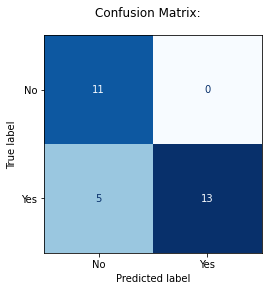

C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

--------------------------------------------------

Classification Report:

              precision    recall  f1-score   support

           0       0.69      1.00      0.81        11
           1       1.00      0.72      0.84        18

    accuracy                           0.83        29
   macro avg       0.84      0.86      0.83        29
weighted avg       0.88      0.83      0.83        29

--------------------------------------------------

Accurracy Of Logistic Regression after Grid Search Is: 82.76%

--------------------------------------------------

Cross Validation Accuracy Scores On 5 Folds For Logistic Regression after Grid Search Are:

Lowest Accuracy Score: 0.83%
Mean Accuracy Score: 0.91%
Highest Accuracy Score: 0.95%


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [41]:
#Train a new Logistic Regression with the best parameters from grid search
logr_clf2 = LogisticRegression(C=3, max_iter=150, random_state=42)
eval_model(logr_clf2, model_name="Logistic Regression after Grid Search")

It looks like we achieved a lower accuracy score after the grid search - **82.76%** compared to our first Logistic Regression model - **86.21%**

### Random Forest
- Random Forest introduces extra randomness when growing trees, instead of searching for the best feature when splitting a node, it searches for the best feature among a random subset of features. Thus, there's more tree diversity, which **trades a higher bias (low accuracy score on training data - ability of a model to fit a theoretical function) for a lower variance (high accuracy score for the test data - ability to generalize to new instances), generally giving a better model**.

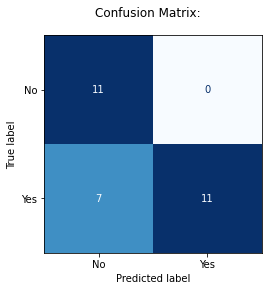

--------------------------------------------------

Classification Report:

              precision    recall  f1-score   support

           0       0.61      1.00      0.76        11
           1       1.00      0.61      0.76        18

    accuracy                           0.76        29
   macro avg       0.81      0.81      0.76        29
weighted avg       0.85      0.76      0.76        29

--------------------------------------------------

Accurracy Of Random Forest Is: 75.86%

--------------------------------------------------

Cross Validation Accuracy Scores On 5 Folds For Random Forest Are:

Lowest Accuracy Score: 0.83%
Mean Accuracy Score: 0.91%
Highest Accuracy Score: 1.00%


In [42]:
#Random Forest
rnd_clf = RandomForestClassifier(random_state=42)
eval_model(model=rnd_clf, model_name="Random Forest")

**Let's see if we can tune the hyperparameters to get a higher score**

In [43]:
#Hyperparameter space
rnd_params = {
    "n_estimators":[50, 100, 200, 300, 400, 600],
    "max_depth":[3, 4, 5, 6, 7, 8, None],
    "max_features": ["auto", "log2"]
}

In [44]:
rnd_grd_search = GridSearchCV(rnd_clf, rnd_params, cv=5, verbose=3, scoring="accuracy")
rnd_grd_search.fit(X_train, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV 1/5] END max_depth=3, max_features=auto, n_estimators=50; total time=   0.0s
[CV 2/5] END max_depth=3, max_features=auto, n_estimators=50; total time=   0.0s
[CV 3/5] END max_depth=3, max_features=auto, n_estimators=50; total time=   0.0s
[CV 4/5] END max_depth=3, max_features=auto, n_estimators=50; total time=   0.0s
[CV 5/5] END max_depth=3, max_features=auto, n_estimators=50; total time=   0.0s
[CV 1/5] END max_depth=3, max_features=auto, n_estimators=100; total time=   0.0s
[CV 2/5] END max_depth=3, max_features=auto, n_estimators=100; total time=   0.0s
[CV 3/5] END max_depth=3, max_features=auto, n_estimators=100; total time=   0.0s
[CV 4/5] END max_depth=3, max_features=auto, n_estimators=100; total time=   0.0s
[CV 5/5] END max_depth=3, max_features=auto, n_estimators=100; total time=   0.0s
[CV 1/5] END max_depth=3, max_features=auto, n_estimators=200; total time=   0.1s
[CV 2/5] END max_depth=3, max_features=au

[CV 1/5] END max_depth=4, max_features=log2, n_estimators=200; total time=   0.1s
[CV 2/5] END max_depth=4, max_features=log2, n_estimators=200; total time=   0.1s
[CV 3/5] END max_depth=4, max_features=log2, n_estimators=200; total time=   0.1s
[CV 4/5] END max_depth=4, max_features=log2, n_estimators=200; total time=   0.1s
[CV 5/5] END max_depth=4, max_features=log2, n_estimators=200; total time=   0.1s
[CV 1/5] END max_depth=4, max_features=log2, n_estimators=300; total time=   0.2s
[CV 2/5] END max_depth=4, max_features=log2, n_estimators=300; total time=   0.3s
[CV 3/5] END max_depth=4, max_features=log2, n_estimators=300; total time=   0.2s
[CV 4/5] END max_depth=4, max_features=log2, n_estimators=300; total time=   0.2s
[CV 5/5] END max_depth=4, max_features=log2, n_estimators=300; total time=   0.2s
[CV 1/5] END max_depth=4, max_features=log2, n_estimators=400; total time=   0.3s
[CV 2/5] END max_depth=4, max_features=log2, n_estimators=400; total time=   0.3s
[CV 3/5] END max

[CV 2/5] END max_depth=6, max_features=auto, n_estimators=400; total time=   0.4s
[CV 3/5] END max_depth=6, max_features=auto, n_estimators=400; total time=   0.3s
[CV 4/5] END max_depth=6, max_features=auto, n_estimators=400; total time=   0.4s
[CV 5/5] END max_depth=6, max_features=auto, n_estimators=400; total time=   0.4s
[CV 1/5] END max_depth=6, max_features=auto, n_estimators=600; total time=   0.6s
[CV 2/5] END max_depth=6, max_features=auto, n_estimators=600; total time=   0.5s
[CV 3/5] END max_depth=6, max_features=auto, n_estimators=600; total time=   0.6s
[CV 4/5] END max_depth=6, max_features=auto, n_estimators=600; total time=   0.6s
[CV 5/5] END max_depth=6, max_features=auto, n_estimators=600; total time=   0.6s
[CV 1/5] END max_depth=6, max_features=log2, n_estimators=50; total time=   0.0s
[CV 2/5] END max_depth=6, max_features=log2, n_estimators=50; total time=   0.0s
[CV 3/5] END max_depth=6, max_features=log2, n_estimators=50; total time=   0.0s
[CV 4/5] END max_de

[CV 4/5] END max_depth=8, max_features=auto, n_estimators=50; total time=   0.0s
[CV 5/5] END max_depth=8, max_features=auto, n_estimators=50; total time=   0.0s
[CV 1/5] END max_depth=8, max_features=auto, n_estimators=100; total time=   0.0s
[CV 2/5] END max_depth=8, max_features=auto, n_estimators=100; total time=   0.0s
[CV 3/5] END max_depth=8, max_features=auto, n_estimators=100; total time=   0.0s
[CV 4/5] END max_depth=8, max_features=auto, n_estimators=100; total time=   0.0s
[CV 5/5] END max_depth=8, max_features=auto, n_estimators=100; total time=   0.0s
[CV 1/5] END max_depth=8, max_features=auto, n_estimators=200; total time=   0.1s
[CV 2/5] END max_depth=8, max_features=auto, n_estimators=200; total time=   0.1s
[CV 3/5] END max_depth=8, max_features=auto, n_estimators=200; total time=   0.1s
[CV 4/5] END max_depth=8, max_features=auto, n_estimators=200; total time=   0.1s
[CV 5/5] END max_depth=8, max_features=auto, n_estimators=200; total time=   0.1s
[CV 1/5] END max_d

[CV 3/5] END max_depth=None, max_features=log2, n_estimators=200; total time=   0.1s
[CV 4/5] END max_depth=None, max_features=log2, n_estimators=200; total time=   0.1s
[CV 5/5] END max_depth=None, max_features=log2, n_estimators=200; total time=   0.1s
[CV 1/5] END max_depth=None, max_features=log2, n_estimators=300; total time=   0.2s
[CV 2/5] END max_depth=None, max_features=log2, n_estimators=300; total time=   0.2s
[CV 3/5] END max_depth=None, max_features=log2, n_estimators=300; total time=   0.2s
[CV 4/5] END max_depth=None, max_features=log2, n_estimators=300; total time=   0.2s
[CV 5/5] END max_depth=None, max_features=log2, n_estimators=300; total time=   0.3s
[CV 1/5] END max_depth=None, max_features=log2, n_estimators=400; total time=   0.3s
[CV 2/5] END max_depth=None, max_features=log2, n_estimators=400; total time=   0.4s
[CV 3/5] END max_depth=None, max_features=log2, n_estimators=400; total time=   0.3s
[CV 4/5] END max_depth=None, max_features=log2, n_estimators=400;

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [50, 100, 200, 300, 400, 600]},
             scoring='accuracy', verbose=3)

In [45]:
rnd_grd_search.best_params_

{'max_depth': 5, 'max_features': 'auto', 'n_estimators': 100}

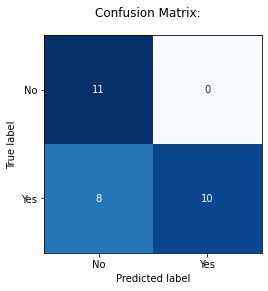

--------------------------------------------------

Classification Report:

              precision    recall  f1-score   support

           0       0.58      1.00      0.73        11
           1       1.00      0.56      0.71        18

    accuracy                           0.72        29
   macro avg       0.79      0.78      0.72        29
weighted avg       0.84      0.72      0.72        29

--------------------------------------------------

Accurracy Of Random Forest after Grid Search Is: 72.41%

--------------------------------------------------

Cross Validation Accuracy Scores On 5 Folds For Random Forest after Grid Search Are:

Lowest Accuracy Score: 0.87%
Mean Accuracy Score: 0.94%
Highest Accuracy Score: 1.00%


In [46]:
#Train a new Random Forest with the best parameters from grid search
rnd_clf2 = RandomForestClassifier(n_estimators=100, max_depth=5, max_features="auto", random_state=42)
eval_model(rnd_clf2, model_name="Random Forest after Grid Search")

After our tuning our **Random Forest** model achieved an accuracy score of **72.41%** on the test set, which is lower than the default (**75.86%**).

### KNN
- We'll be using KNN because we have a relatively small dataset, noise-free data and well defined labeled classes.

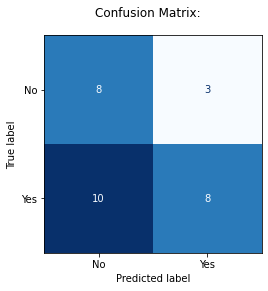

--------------------------------------------------

Classification Report:

              precision    recall  f1-score   support

           0       0.44      0.73      0.55        11
           1       0.73      0.44      0.55        18

    accuracy                           0.55        29
   macro avg       0.59      0.59      0.55        29
weighted avg       0.62      0.55      0.55        29

--------------------------------------------------

Accurracy Of KNN Is: 55.17%

--------------------------------------------------

Cross Validation Accuracy Scores On 5 Folds For KNN Are:

Lowest Accuracy Score: 0.50%
Mean Accuracy Score: 0.67%
Highest Accuracy Score: 0.74%


In [47]:
#KNN
knn_clf = KNeighborsClassifier()
eval_model(knn_clf, model_name="KNN")

In [48]:
#Hyperparameter space
knn_params = {
    "n_neighbors":range(1,10)
}

In [49]:
knn_grd_search = GridSearchCV(knn_clf, knn_params, cv=5, verbose=3, scoring="accuracy")
knn_grd_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..................................n_neighbors=1; total time=   0.0s
[CV 2/5] END ..................................n_neighbors=1; total time=   0.0s
[CV 3/5] END ..................................n_neighbors=1; total time=   0.0s
[CV 4/5] END ..................................n_neighbors=1; total time=   0.0s
[CV 5/5] END ..................................n_neighbors=1; total time=   0.0s
[CV 1/5] END ..................................n_neighbors=2; total time=   0.0s
[CV 2/5] END ..................................n_neighbors=2; total time=   0.0s
[CV 3/5] END ..................................n_neighbors=2; total time=   0.0s
[CV 4/5] END ..................................n_neighbors=2; total time=   0.0s
[CV 5/5] END ..................................n_neighbors=2; total time=   0.0s
[CV 1/5] END ..................................n_neighbors=3; total time=   0.0s
[CV 2/5] END ..................................n_

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 10)}, scoring='accuracy',
             verbose=3)

In [50]:
knn_grd_search.best_params_

{'n_neighbors': 3}

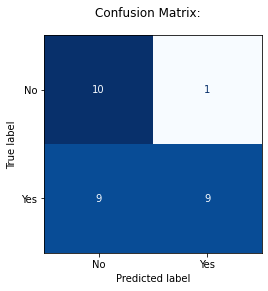

--------------------------------------------------

Classification Report:

              precision    recall  f1-score   support

           0       0.53      0.91      0.67        11
           1       0.90      0.50      0.64        18

    accuracy                           0.66        29
   macro avg       0.71      0.70      0.65        29
weighted avg       0.76      0.66      0.65        29

--------------------------------------------------

Accurracy Of KNN after Grid Search Is: 65.52%

--------------------------------------------------

Cross Validation Accuracy Scores On 5 Folds For KNN after Grid Search Are:

Lowest Accuracy Score: 0.50%
Mean Accuracy Score: 0.68%
Highest Accuracy Score: 0.78%


In [51]:
#Train a new KNN with the best parameters from grid search
knn_clf2 = KNeighborsClassifier(n_neighbors=3)
eval_model(knn_clf2, model_name="KNN after Grid Search")

After the grid searc, KNN classfifier achieved an accuracy of **65.52%** - which is higher than the default model (**55.17%**). Yet, it's not high enough to consider it as our final model

### XGBoost
- XGBoost is an optimized gradient boosting library. That is, an ensemble method that combines several weak learners into a strong learner. Essentially, this method sequentially trains predictors, each trying to correct its predecessor.
- Boosting control both bias and variance, thus is considered more effective

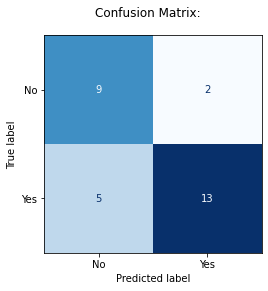

--------------------------------------------------

Classification Report:

              precision    recall  f1-score   support

           0       0.64      0.82      0.72        11
           1       0.87      0.72      0.79        18

    accuracy                           0.76        29
   macro avg       0.75      0.77      0.75        29
weighted avg       0.78      0.76      0.76        29

--------------------------------------------------

Accurracy Of XGB Is: 75.86%

--------------------------------------------------

Cross Validation Accuracy Scores On 5 Folds For XGB Are:

Lowest Accuracy Score: 0.78%
Mean Accuracy Score: 0.90%
Highest Accuracy Score: 1.00%


In [52]:
#XGBoost
#Set objective=binary:logistic" because were training a classifier with only two class output
#Set verbosity=0 because xgboost prints a warning about an updated to be implemted in the next version
xgb_clf = XGBClassifier(objective="binary:logistic", seed=42, use_label_encoder=False, verbosity=0)
eval_model(xgb_clf, model_name="XGB")

In [53]:
#Hyperparameter space
xgb_params = {
    "n_estimators":range(50, 600, 50),
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth":range(3, 10, 1)
}

In [54]:
xgb_grd_search = GridSearchCV(xgb_clf, xgb_params, cv=5, verbose=3, scoring="accuracy")
xgb_grd_search.fit(X_train, y_train)

Fitting 5 folds for each of 231 candidates, totalling 1155 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=150; total time=   0.0s
[CV 2/5] END learning_rate=0

[CV 5/5] END learning_rate=0.01, max_depth=4, n_estimators=450; total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=4, n_estimators=500; total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_depth=4, n_estimators=500; total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_depth=4, n_estimators=500; total time=   0.1s
[CV 4/5] END learning_rate=0.01, max_depth=4, n_estimators=500; total time=   0.1s
[CV 5/5] END learning_rate=0.01, max_depth=4, n_estimators=500; total time=   0.1s
[CV 1/5] END learning_rate=0.01, max_depth=4, n_estimators=550; total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_depth=4, n_estimators=550; total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_depth=4, n_estimators=550; total time=   0.1s
[CV 4/5] END learning_rate=0.01, max_depth=4, n_estimators=550; total time=   0.1s
[CV 5/5] END learning_rate=0.01, max_depth=4, n_estimators=550; total time=   0.1s
[CV 1/5] END learning_rate=0.01, max_depth=5, n_estimators=50; total time=   0.0s
[CV 2

[CV 5/5] END learning_rate=0.01, max_depth=6, n_estimators=350; total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=6, n_estimators=400; total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=6, n_estimators=400; total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=6, n_estimators=400; total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=6, n_estimators=400; total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=6, n_estimators=400; total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=6, n_estimators=450; total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=6, n_estimators=450; total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=6, n_estimators=450; total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=6, n_estimators=450; total time=   0.1s
[CV 5/5] END learning_rate=0.01, max_depth=6, n_estimators=450; total time=   0.1s
[CV 1/5] END learning_rate=0.01, max_depth=6, n_estimators=500; total time=   0.1s
[CV 

[CV 4/5] END learning_rate=0.01, max_depth=8, n_estimators=250; total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=8, n_estimators=250; total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=8, n_estimators=300; total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=8, n_estimators=300; total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=8, n_estimators=300; total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=8, n_estimators=300; total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=8, n_estimators=300; total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=8, n_estimators=350; total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=8, n_estimators=350; total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=8, n_estimators=350; total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=8, n_estimators=350; total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=8, n_estimators=350; total time=   0.0s
[CV 

[CV 4/5] END learning_rate=0.05, max_depth=3, n_estimators=150; total time=   0.0s
[CV 5/5] END learning_rate=0.05, max_depth=3, n_estimators=150; total time=   0.0s
[CV 1/5] END learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.0s
[CV 2/5] END learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.0s
[CV 3/5] END learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.0s
[CV 4/5] END learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.0s
[CV 5/5] END learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.0s
[CV 1/5] END learning_rate=0.05, max_depth=3, n_estimators=250; total time=   0.0s
[CV 2/5] END learning_rate=0.05, max_depth=3, n_estimators=250; total time=   0.0s
[CV 3/5] END learning_rate=0.05, max_depth=3, n_estimators=250; total time=   0.0s
[CV 4/5] END learning_rate=0.05, max_depth=3, n_estimators=250; total time=   0.0s
[CV 5/5] END learning_rate=0.05, max_depth=3, n_estimators=250; total time=   0.0s
[CV 

[CV 3/5] END learning_rate=0.05, max_depth=5, n_estimators=50; total time=   0.0s
[CV 4/5] END learning_rate=0.05, max_depth=5, n_estimators=50; total time=   0.0s
[CV 5/5] END learning_rate=0.05, max_depth=5, n_estimators=50; total time=   0.0s
[CV 1/5] END learning_rate=0.05, max_depth=5, n_estimators=100; total time=   0.0s
[CV 2/5] END learning_rate=0.05, max_depth=5, n_estimators=100; total time=   0.0s
[CV 3/5] END learning_rate=0.05, max_depth=5, n_estimators=100; total time=   0.0s
[CV 4/5] END learning_rate=0.05, max_depth=5, n_estimators=100; total time=   0.0s
[CV 5/5] END learning_rate=0.05, max_depth=5, n_estimators=100; total time=   0.0s
[CV 1/5] END learning_rate=0.05, max_depth=5, n_estimators=150; total time=   0.0s
[CV 2/5] END learning_rate=0.05, max_depth=5, n_estimators=150; total time=   0.0s
[CV 3/5] END learning_rate=0.05, max_depth=5, n_estimators=150; total time=   0.0s
[CV 4/5] END learning_rate=0.05, max_depth=5, n_estimators=150; total time=   0.0s
[CV 5/5

[CV 2/5] END learning_rate=0.05, max_depth=6, n_estimators=500; total time=   0.0s
[CV 3/5] END learning_rate=0.05, max_depth=6, n_estimators=500; total time=   0.0s
[CV 4/5] END learning_rate=0.05, max_depth=6, n_estimators=500; total time=   0.0s
[CV 5/5] END learning_rate=0.05, max_depth=6, n_estimators=500; total time=   0.0s
[CV 1/5] END learning_rate=0.05, max_depth=6, n_estimators=550; total time=   0.0s
[CV 2/5] END learning_rate=0.05, max_depth=6, n_estimators=550; total time=   0.0s
[CV 3/5] END learning_rate=0.05, max_depth=6, n_estimators=550; total time=   0.0s
[CV 4/5] END learning_rate=0.05, max_depth=6, n_estimators=550; total time=   0.0s
[CV 5/5] END learning_rate=0.05, max_depth=6, n_estimators=550; total time=   0.0s
[CV 1/5] END learning_rate=0.05, max_depth=7, n_estimators=50; total time=   0.0s
[CV 2/5] END learning_rate=0.05, max_depth=7, n_estimators=50; total time=   0.0s
[CV 3/5] END learning_rate=0.05, max_depth=7, n_estimators=50; total time=   0.0s
[CV 4/5

[CV 1/5] END learning_rate=0.05, max_depth=8, n_estimators=400; total time=   0.0s
[CV 2/5] END learning_rate=0.05, max_depth=8, n_estimators=400; total time=   0.0s
[CV 3/5] END learning_rate=0.05, max_depth=8, n_estimators=400; total time=   0.0s
[CV 4/5] END learning_rate=0.05, max_depth=8, n_estimators=400; total time=   0.0s
[CV 5/5] END learning_rate=0.05, max_depth=8, n_estimators=400; total time=   0.0s
[CV 1/5] END learning_rate=0.05, max_depth=8, n_estimators=450; total time=   0.0s
[CV 2/5] END learning_rate=0.05, max_depth=8, n_estimators=450; total time=   0.0s
[CV 3/5] END learning_rate=0.05, max_depth=8, n_estimators=450; total time=   0.0s
[CV 4/5] END learning_rate=0.05, max_depth=8, n_estimators=450; total time=   0.0s
[CV 5/5] END learning_rate=0.05, max_depth=8, n_estimators=450; total time=   0.0s
[CV 1/5] END learning_rate=0.05, max_depth=8, n_estimators=500; total time=   0.0s
[CV 2/5] END learning_rate=0.05, max_depth=8, n_estimators=500; total time=   0.0s
[CV 

[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=200; total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=200; total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=200; total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=250; total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=250; total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=250; total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=250; total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=250; total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=300; total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=300; total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=300; total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=300; total time=   0.0s
[CV 5/5] END lea

[CV 3/5] END learning_rate=0.1, max_depth=8, n_estimators=550; total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=8, n_estimators=550; total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=8, n_estimators=550; total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=9, n_estimators=50; total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=9, n_estimators=50; total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=9, n_estimators=50; total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=9, n_estimators=50; total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=9, n_estimators=50; total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=9, n_estimators=100; total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=9, n_estimators=100; total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=9, n_estimators=100; total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=9, n_estimators=100; total time=   0.0s
[CV 5/5] END learning

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=4,
                                     num_parallel_tree=1, random_state=42,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=42, subsample=1,
                                     tree_method='exact',
                      

In [55]:
xgb_grd_search.best_params_

{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 550}

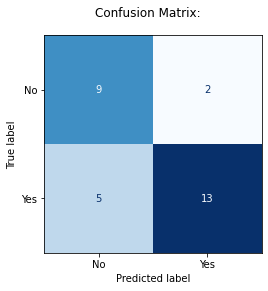

--------------------------------------------------

Classification Report:

              precision    recall  f1-score   support

           0       0.64      0.82      0.72        11
           1       0.87      0.72      0.79        18

    accuracy                           0.76        29
   macro avg       0.75      0.77      0.75        29
weighted avg       0.78      0.76      0.76        29

--------------------------------------------------

Accurracy Of XGB after Grid Search Is: 75.86%

--------------------------------------------------

Cross Validation Accuracy Scores On 5 Folds For XGB after Grid Search Are:

Lowest Accuracy Score: 0.78%
Mean Accuracy Score: 0.90%
Highest Accuracy Score: 1.00%


In [56]:
#Train a new XGB with the best parameters from grid search
xgb_clf2 = XGBClassifier(objective="binary:logistic", learning_rate=0.05, max_depth=4, n_estimators=550, seed=42,
                         use_label_encoder=False, verbosity=0)
eval_model(xgb_clf2, model_name="XGB after Grid Search")

It seems that it achieved the same accuracy score as the first XGB. In that case, let's see how it does on the test set

Looks like **XGB** has an accuracy of **75.86%**, which is better than Random Forest 72.41%!

## Evaluate trained classifiers with the ROC and AUC

The ***predict_proba()*** method returns an array containing a **row per instance** and a **column per class**, each containing the probablity that the given instance belong to a given class. 

Each classifier has 2 versions: **(i)** default and after **(ii)** grid search. We'll be taking the versions of each classifier that gave the highest accuracy.

In [57]:
#Logistic Regression
logr_prob = logr_clf.predict_proba(X_test)[:,1]
#Random Forest
rnd_prob = rnd_clf.predict_proba(X_test)[:,1]
#KNN
knn_prob = knn_clf2.predict_proba(X_test)[:,1]
#XGBoost
xgb_prob = xgb_clf.predict_proba(X_test)[:,1]

### AUC

#### Calculate AUC

In [58]:
logr_auc = roc_auc_score(y_test, logr_prob)
rnd_auc = roc_auc_score(y_test, rnd_prob)
knn_auc = roc_auc_score(y_test, knn_prob)
xgb_auc = roc_auc_score(y_test, xgb_prob)

### ROC

#### Calculate the ROC curve

In [59]:
logr_fpr, logr_tpr, threshold = roc_curve(y_test, logr_prob)
rnd_fpr, rnd_tpr, threshold = roc_curve(y_test, rnd_prob)
knn_fpr, knn_tpr, threshold = roc_curve(y_test, knn_prob)
xgb_fpr, xgb_tpr, threshold = roc_curve(y_test, xgb_prob)

### Plot ROC and AUC

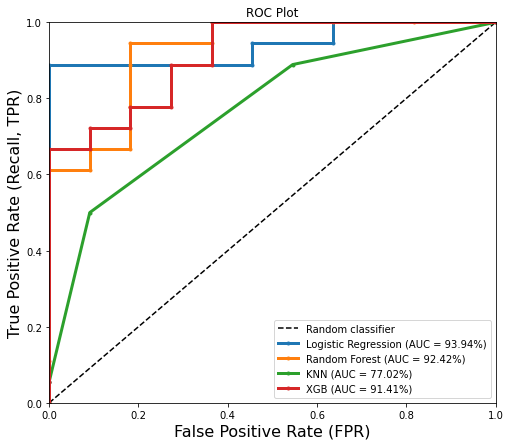

In [60]:
plt.figure(figsize=(8, 7))
plt.plot([0, 1], [0, 1], "k--", label="Random classifier")
plt.plot(logr_fpr, logr_tpr, marker=".", linewidth=3, label="Logistic Regression (AUC = {:.2f}%)".format(logr_auc*100))
plt.plot(rnd_fpr, rnd_tpr, marker=".", linewidth=3, label="Random Forest (AUC = {:.2f}%)".format(rnd_auc*100))
plt.plot(knn_fpr, knn_tpr, marker=".", linewidth=3, label="KNN (AUC = {:.2f}%)".format(knn_auc*100))
plt.plot(xgb_fpr, xgb_tpr, marker=".", linewidth=3, label="XGB (AUC = {:.2f}%)".format(xgb_auc*100))
plt.title("ROC Plot")
plt.xlabel("False Positive Rate (FPR)", fontsize=16)
plt.ylabel("True Positive Rate (Recall, TPR)", fontsize=16)
plt.axis([0, 1, 0, 1])
plt.legend()
plt.show()

## Evaluation results

We can conclude that **Logistic Regression** is the best model with an **accuracy of 86.21%** and **AUC of 93.94%**

## Feature importance

Let's see if we can get a better Logistic Regression model if we choose only the important features

In [61]:
permut_importanace = PermutationImportance(logr_clf, random_state=42)
permut_importanace.fit(X_test, y_test)

PermutationImportance(estimator=LogisticRegression(random_state=42),
                      random_state=42)

In [62]:
eli5.show_weights(permut_importanace, feature_names=X_test.columns.tolist())

Weight,Feature
0.1034 ± 0.0975,past_mh
0.0621 ± 0.0516,friends_fam_mh_reveal
0.0552 ± 0.0828,diagnosed_mh
0.0483 ± 0.1202,prev_employer_ph_importance
0.0345 ± 0.0436,future_employer_ph_reveal
0.0276 ± 0.0804,mh_with_treatment_impact_on_work
0.0276 ± 0.0676,employer_mh_leave_difficulty
0.0207 ± 0.0338,prev_employer_mh_coverage
0.0207 ± 0.0552,mh_with_no_treatment_impact_on_work
0.0138 ± 0.0338,employer_mh_coverage


The first number in each row shows how much model performance decreased with random shuffling (in this case, using "accuracy" as the performance metric).


Each permutataion importance has a degree of randomeness when shuffeling between columns. The number after the $\pm$ shows the amount of varied performance between each re-shuffle of the columns.

#### Create a new dataset with only features that have an importance above 0.0069

In [63]:
features_list = [
    "past_mh",
    "friends_fam_mh_reveal",
    "diagnosed_mh",
    "prev_employer_ph_importance",
    "future_employer_ph_reveal",
    "mh_with_treatment_impact_on_work",
    "employer_mh_leave_difficulty",
    "prev_employer_mh_coverage",
    "mh_with_no_treatment_impact_on_work",
    "employer_mh_coverage",
    "mh_positive_response_at_work_desc"
]

X_train_new = X_train[features_list]
X_test_new = X_test[features_list]

### Logistic Regerssion - Important Features

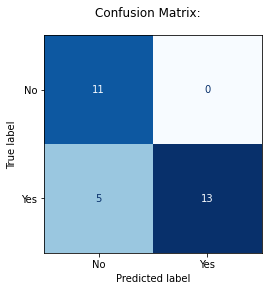

--------------------------------------------------

Classification Report:

              precision    recall  f1-score   support

           0       0.69      1.00      0.81        11
           1       1.00      0.72      0.84        18

    accuracy                           0.83        29
   macro avg       0.84      0.86      0.83        29
weighted avg       0.88      0.83      0.83        29

--------------------------------------------------

Accurracy Of Logistic Regression - Important Features Is: 82.76%

--------------------------------------------------

Cross Validation Accuracy Scores On 5 Folds For Logistic Regression - Important Features Are:

Lowest Accuracy Score: 0.87%
Mean Accuracy Score: 0.90%
Highest Accuracy Score: 0.95%


In [64]:
logr_clf_perm = LogisticRegression(random_state=42)
eval_model(logr_clf_perm, X_train=X_train_new, X_test=X_test_new, model_name="Logistic Regression - Important Features")

### Evaluate new Logistic Regression

In [65]:
logr_perm_prob = logr_clf_perm.predict_proba(X_test_new)[:, 1]

In [66]:
logr_per_auc = roc_auc_score(y_test, logr_perm_prob)

In [67]:
logr_per_fpr, logr_per_tpr, threshold = roc_curve(y_test, logr_perm_prob)

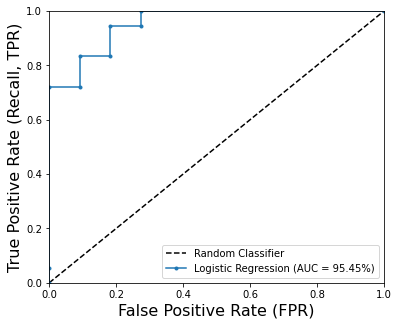

In [68]:
plt.figure(figsize=(6,5))
plt.plot([0, 1], [0, 1], "k--", label="Random Classifier")
plt.plot(logr_per_fpr, logr_per_tpr, marker=".", label="Logistic Regression (AUC = {:.2f}%)".format(logr_per_auc*100))
plt.xlabel("False Positive Rate (FPR)", fontsize=16)
plt.ylabel("True Positive Rate (Recall, TPR)", fontsize=16)
plt.axis([0, 1, 0, 1])
plt.legend()
plt.show()

# 5. Conclusion

With a feature space of 50, the best model was a Logistic Regression with an accuracy of - 86.21% and an AUC of 93.94%. 


After the feature importance, the current Logistic Regression model achieved a slightly lower accuracy score of 82.76% but with only 11 features. **That is, we managed to reduce the feature space by almost 80% with at the cost of 3.45% accuracy!**

### List of Important Features

**Individual Level**

- past_mh - **Have you had a mental health disorder in the past?**
- friends_fam_mh_reveal - **How willing would you be to share with friends and family that you have a mental illness?**
- diagnosed_mh - **Have you ever been *diagnosed* with a mental health disorder?**
- mh_with_treatment_impact_on_work - **If you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?**
- mh_with_no_treatment_impact_on_work - **If you have a mental health disorder, how often do you feel that it interferes with your work when NOT being treated effectively (i.e., when you are experiencing symptoms)?**

**Company Level**

- employer_mh_leave_difficulty - **If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?**
- employer_mh_coverage - **Does your employer provide mental health benefits as part of healthcare coverage?**
- mh_positive_response_at_work_desc - **Have you observed or experienced a *supportive or well handled response* to a mental health issue in your current or previous workplace?**
- prev_employer_mh_coverage - **Have your previous employers provided mental health benefits?**
- prev_employer_ph_importance - **Overall, how much importance did your previous employer place on physical health?**
- future_employer_ph_reveal - **Would you be willing to bring up a physical health issue with a potential employer in an interview?**

Psychological effects of mental health varies from person to person, thus managing to reduce the number of features to 11 can serve as a guiding tool to build a solid foundation for programs in the workplace. Moreso, the responsibilities of employers, e.g, having mental health or not, and accountability measures for employees, e.g, sharing with ones close social circle.

WRITE ABOUT SOCAIL FACTORS